### Households (financial transactions and demographic) (WIP)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset includes information related to individuals or households, possibly in the context of financial transactions and demographics. It could be used for various analyses, such as customer segmentation, risk assessment, or predicting financial behavior.

The objective is to build a machine learning model that can predict whether a customer is likely to receive a discount offering based on various features provided in the dataset. The features include demographic information (such as age band, gender, and region), financial information (investment, loans, balances), and other customer-related attributes.

### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read & Explore the Data

In [ ]:
# d = pd.read_csv('Excel/Discount Offering.csv')
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/Discount Offering.csv')
d

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,No,No,1998,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,Yes,No,1996,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,No,No,1997,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,No,No,1995,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,No,No,1972,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,11513,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,No,No,1988,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,11514,2,41-45,Partner,Housewife,Professional,Own Home,No,No,1992,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,11516,Zero,51-55,Partner,Other,Manual Worker,Own Home,No,Yes,1970,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   year_last_moved                  10155 non-null  int64  
 10  TVarea                           10155 non-null  object 
 11  post_code                        10155 non-null  object 
 12  post_area         

### Clean and Map the data

In [ ]:
# None
# d.isnull().sum()
# d.duplicated().sum()

In [ ]:
for col in d:
    if d[col].dtypes == 'object':
        print(col ,d[col].unique())

children ['Zero' '1' '2' '3' '4+']
age_band ['51-55' '55-60' '26-30' '18-21' '45-50' '36-40' '61-65' '31-35' '41-45'
 '71+' '22-25' '65-70' 'Unknown']
status ['Partner' 'Single/Never Married' 'Widowed' 'Divorced/Separated' 'Unknown']
occupation ['Manual Worker' 'Retired' 'Professional' 'Business Manager'
 'Secretarial/Admin' 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Manual Worker' 'Unknown'
 'Professional' 'Business Manager' 'Housewife' 'Student']
home_status ['Own Home' 'Rent from Council/HA' 'Rent Privately' 'Live in Parental Hom'
 'Unclassified']
self_employed ['No' 'Yes']
self_employed_partner ['No' 'Yes']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP4 9HS' 'M41 0QH' 'NE30 1JZ' ... 'OX15 0PU' 'CM15 0LU' 'SA70 7LW']
post_area ['NP4' 'M41' 'NE30' ... 'WV4' 'S10' 'PH13']
gender ['Female' 'Male' 'Unkno

In [ ]:
# Check unique values of all 'Object' types
for column in d.columns:
    if d[column].dtype == 'object':
        num_distinct_values = len(d[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

children - 5 distinct values
age_band - 13 distinct values
status - 5 distinct values
occupation - 9 distinct values
occupation_partner - 9 distinct values
home_status - 5 distinct values
self_employed - 2 distinct values
self_employed_partner - 2 distinct values
TVarea - 14 distinct values
post_code - 10040 distinct values
post_area - 2039 distinct values
gender - 3 distinct values
region - 13 distinct values


In [ ]:
print(d['post_code'].unique())
print(f"\n{d['post_area'].unique()}")

['NP4 9HS' 'M41 0QH' 'NE30 1JZ' ... 'OX15 0PU' 'CM15 0LU' 'SA70 7LW']

['NP4' 'M41' 'NE30' ... 'WV4' 'S10' 'PH13']


In [ ]:
d['post_code'].str[:2]

0        NP
1        M4
2        NE
3        HR
4        KA
         ..
10150    SM
10151    RG
10152    OX
10153    CM
10154    SA
Name: post_code, Length: 10155, dtype: object

In [ ]:
d['post_code'] = d['post_code'].str[:2]

In [ ]:
d['post_code'].value_counts()

WA    249
PR    239
NG    209
SA    205
CF    199
     ... 
GY      1
EC      1
WC      1
HS      1
L0      1
Name: post_code, Length: 157, dtype: int64

In [ ]:
# We CAN group region into a category that'll minimize the cardinality
d['region'].value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                571
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

In [ ]:
region_mapping = {
    'South East': 'Southern',
    'North West': 'Northern',
    'South West': 'Southern',
    'West Midlands': 'Midlands',
    'Scotland': 'Scotland',
    'East Midlands': 'Midlands',
    'North': 'Northern',
    'Wales': 'Wales',
    'East Anglia': 'Eastern',
    'Northern Ireland': 'Ireland',
    'Isle of Man': 'Isle of Man',
    'Channel Islands': 'Channel Islands',
    'Unknown': 'Unknown'
}

d['regions'] = d['region'].map(region_mapping)
d.drop(columns = ['region'], inplace = True)

In [ ]:
d['regions'].value_counts()

Southern           3071
Northern           2467
Midlands           1591
Unknown            1080
Scotland            787
Wales               556
Eastern             423
Ireland             159
Isle of Man          16
Channel Islands       5
Name: regions, dtype: int64

In [ ]:
d['regions'].replace({'Unknown' : 'Other'}, inplace = True)

In [ ]:
d.drop(['REF_NO','post_area'], axis = 1, inplace = True)

In [ ]:
d['children'].replace({'Zero': 0, '1': 1, '2' : 2, '3' : 3, '4+' : 4}, inplace = True)

In [ ]:
# d[d['age_band'] == 'Unknown'].count()
d.age_band.value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [ ]:
age_mapping = {'51-55': 53, '55-60': 58, '26-30': 28, '18-21': 20, '45-50': 48,
               '36-40': 38, '61-65': 63, '31-35': 33, '41-45': 43, '71+': 75,
               '22-25': 23, '65-70': 68, 'Unknown': np.nan}  # Using np.nan for 'Unknown'

d['age_band'] = d['age_band'].replace(age_mapping)

##### Imputing missing values with the median bcoz its' a safe choice. It provides a measure of central tendency that is not affected by extreme values.

In [ ]:
median_age = d['age_band'].median()
d['age_band'].fillna(median_age, inplace=True)

In [ ]:
print(d.gender.value_counts())

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64


In [ ]:
# I considered removing the Unknown gender, keboz, yes
d = d[d['gender'] != 'Unknown']

In [ ]:
d['status'].value_counts()

Partner                 7683
Single/Never Married    1096
Divorced/Separated       676
Widowed                  617
Unknown                   48
Name: status, dtype: int64

In [ ]:
d['status'].replace({'Partner': 'Married', 'Single/Never Married': 'Not_Married', 'Divorced/Separated' : 'Divorced'}, inplace = True)

In [ ]:
d['status'].value_counts()

Married        7683
Not_Married    1096
Divorced        676
Widowed         617
Unknown          48
Name: status, dtype: int64

In [ ]:
d[d['status'] == 'Unknown']

,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,regions
257,0,48.0,Unknown,Unknown,Unknown,Unclassified,No,No,0,TV South West,...,0.00,4.99,0.00,1,Male,73.36,11.99,50.14,130.31,Southern
263,0,48.0,Unknown,Unknown,Unknown,Unclassified,No,No,0,Scottish TV,...,0.00,5.98,0.00,2,Female,49.04,19.82,39.14,102.82,Scotland
362,0,58.0,Unknown,Retired,Retired,Unclassified,No,No,1998,Yorkshire,...,29.47,0.00,0.00,2,Female,7.00,8.41,8.41,22.25,Midlands
454,0,28.0,Unknown,Secretarial/Admin,Unknown,Own Home,No,No,1997,Scottish TV,...,0.00,0.00,0.00,2,Female,20.99,0.00,13.16,18.79,Scotland
468,0,48.0,Unknown,Unknown,Unknown,Unclassified,No,No,0,Anglia,...,0.00,0.00,0.00,2,Male,51.68,52.87,59.45,165.57,Eastern
493,0,53.0,Unknown,Secretarial/Admin,Retired,Own Home,No,No,1993,Carlton,...,0.00,0.00,0.00,2,Female,0.00,15.58,15.58,21.30,Southern
783,0,53.0,Unknown,Secretarial/Admin,Business Manager,Own Home,No,Yes,1989,Anglia,...,0.00,0.00,0.00,2,Female,0.00,4.91,4.91,46.98,Southern
1069,0,68.0,Unknown,Retired,Unknown,Own Home,No,No,1998,TV South West,...,0.00,0.00,19.99,2,Female,30.97,3.33,24.14,35.97,Southern
1079,0,48.0,Unknown,Unknown,Unknown,Unclassified,Yes,Yes,0,HTV,...,0.10,0.00,0.00,2,Male,19.19,0.02,7.68,47.42,Wales
1097,0,48.0,Unknown,Professional,Unknown,Own Home,No,No,0,Meridian,...,0.00,0.00,0.02,2,Female,1.50,0.00,1.25,-11.44,Southern


#### Given the prevalence of 'unknown' values across multiple columns, individually imputing each entry could be time-consuming and potentially introduce bias. So it'll be better to drop these.

In [ ]:
d = d[d['status'] != 'Unknown']

In [ ]:
categorical_columns = ['occupation', 'occupation_partner', 'self_employed', 'self_employed_partner']
correlation_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
# Calculate Cramér's V for each pair of categorical variables
from scipy.stats import chi2_contingency
for col1 in categorical_columns:
    for col2 in categorical_columns:
        confusion_matrix = pd.crosstab(d[col1], d[col2])
        correlation_results.loc[col1, col2] = cramers_v(confusion_matrix)

print("Correlation matrix using Cramér's V:")
correlation_results

Correlation matrix using Cramér's V:


,occupation,occupation_partner,self_employed,self_employed_partner
occupation,1.0,0.265304,0.354165,0.185554
occupation_partner,0.265304,1.0,0.118366,0.200312
self_employed,0.354165,0.118366,0.999245,0.246165
self_employed_partner,0.185554,0.200312,0.246165,0.999498


In [ ]:
d.home_status.value_counts()

Own Home                9365
Rent from Council/HA     321
Rent Privately           260
Live in Parental Hom     108
Unclassified              18
Name: home_status, dtype: int64

In [ ]:
condition = (d['home_status'] == 'Unclassified') & (d['occupation'] == 'Unknown') & (d['occupation_partner'] == 'Unknown')
d = d.drop(d[condition].index)

In [ ]:
d.home_status.value_counts()

Own Home                9365
Rent from Council/HA     321
Rent Privately           260
Live in Parental Hom     108
Unclassified              13
Name: home_status, dtype: int64

In [ ]:
d[d['home_status'] == 'Unclassified']

,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,regions
656,0,28.0,Married,Other,Business Manager,Unclassified,No,No,0,Central,...,0.00,3.99,0.00,2,Female,43.07,10.57,26.81,87.37,Midlands
3058,3,28.0,Married,Business Manager,Housewife,Unclassified,No,No,0,Central,...,8.47,19.96,35.97,2,Male,14.69,27.22,28.56,97.47,Midlands
3580,0,48.0,Married,Professional,Professional,Unclassified,No,No,0,Yorkshire,...,0.00,9.99,0.00,2,Male,21.48,1.67,12.99,65.22,Other
4314,1,33.0,Married,Housewife,Business Manager,Unclassified,No,No,0,TV South West,...,0.00,0.00,0.00,2,Female,13.89,47.80,49.46,79.22,Southern
4362,0,48.0,Married,Retired,Retired,Unclassified,No,No,0,TV South West,...,0.00,0.00,0.00,2,Male,36.98,4.16,21.65,40.29,Southern
4933,1,28.0,Married,Professional,Professional,Unclassified,No,No,0,Scottish TV,...,0.00,0.00,0.00,2,Female,6.00,0.00,4.92,29.47,Scotland
5534,1,28.0,Married,Business Manager,Secretarial/Admin,Unclassified,No,No,1995,Unknown,...,23.48,7.49,21.45,2,Male,191.83,69.35,140.83,402.96,Isle of Man
6774,0,23.0,Not_Married,Professional,Unknown,Unclassified,No,No,1998,Unknown,...,24.99,24.46,0.00,2,Female,0.00,11.57,7.50,40.96,Northern
7369,0,23.0,Married,Business Manager,Professional,Unclassified,No,No,1999,Yorkshire,...,0.00,0.00,0.00,2,Female,11.59,2.50,9.66,50.10,Midlands
9166,0,20.0,Not_Married,Student,Unknown,Unclassified,No,No,1983,Scottish TV,...,21.96,0.00,11.48,2,Female,41.88,25.13,43.96,128.52,Scotland


In [ ]:
d[(d['year_last_moved'] == 0) & (d['occupation'] == 'Unknown') & (d['occupation_partner'] == 'Unknown')]

,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,regions
611,0,63.0,Married,Unknown,Unknown,Own Home,No,No,0,Anglia,...,24.99,13.98,0.00,2,Female,8.09,25.81,30.23,56.83,Eastern
1558,1,43.0,Married,Unknown,Unknown,Own Home,No,No,0,HTV,...,6.99,12.48,79.25,2,Female,121.64,51.84,74.45,195.19,Wales
2575,2,43.0,Married,Unknown,Unknown,Own Home,Yes,No,0,Yorkshire,...,9.23,13.97,27.46,2,Female,35.06,26.84,29.26,34.84,Midlands
4456,0,58.0,Married,Unknown,Unknown,Own Home,No,No,0,Central,...,0.00,0.00,2.79,2,Male,10.30,5.45,9.32,95.29,Midlands
5213,0,53.0,Married,Unknown,Unknown,Own Home,No,No,0,Central,...,0.00,0.00,0.00,2,Female,34.19,15.23,31.22,101.59,Midlands
6282,2,28.0,Not_Married,Unknown,Unknown,Own Home,No,No,0,Yorkshire,...,1.80,5.99,3.99,2,Female,43.84,13.18,16.17,45.30,Other
6342,0,53.0,Widowed,Unknown,Unknown,Rent from Council/HA,No,No,0,Granada,...,2.00,0.00,0.00,2,Female,10.99,19.83,20.83,38.17,Wales
7208,0,58.0,Divorced,Unknown,Unknown,Rent Privately,No,No,0,Granada,...,0.00,0.00,0.00,2,Female,17.49,2.50,8.83,45.79,Northern
8372,0,58.0,Married,Unknown,Unknown,Own Home,No,No,0,Granada,...,19.49,0.00,13.49,2,Female,41.96,23.04,29.53,19.75,Northern
9961,0,28.0,Not_Married,Unknown,Unknown,Own Home,No,No,0,Carlton,...,20.46,4.49,4.49,2,Female,51.77,29.29,64.03,148.49,Southern


In [ ]:
condition = (d['year_last_moved'] == 0) & (d['occupation'] == 'Unknown') & (d['occupation_partner'] == 'Unknown')
d = d.drop(d[condition].index)

In [ ]:
for col in d:
    if d[col].dtypes == 'object':
        print(col ,d[col].unique())

status ['Married' 'Not_Married' 'Widowed' 'Divorced']
occupation ['Manual Worker' 'Retired' 'Professional' 'Business Manager'
 'Secretarial/Admin' 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Manual Worker' 'Unknown'
 'Professional' 'Business Manager' 'Housewife' 'Student']
home_status ['Own Home' 'Rent from Council/HA' 'Rent Privately' 'Live in Parental Hom'
 'Unclassified']
self_employed ['No' 'Yes']
self_employed_partner ['No' 'Yes']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR'

In [ ]:
d[(d['occupation'] == 'Unknown') & (d['occupation_partner'] == 'Unknown')]

,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,regions
61,1,38.0,Married,Unknown,Unknown,Rent from Council/HA,Yes,No,1986,Carlton,...,14.00,6.99,336.38,1,Female,70.95,96.02,71.34,235.28,Southern
68,1,58.0,Married,Unknown,Unknown,Own Home,Yes,Yes,1995,Central,...,0.00,0.00,24.98,2,Male,18.69,10.32,18.23,24.45,Southern
74,2,38.0,Married,Unknown,Unknown,Own Home,Yes,Yes,1996,Central,...,0.00,0.00,0.00,2,Female,0.00,0.00,0.00,22.82,Midlands
100,2,28.0,Married,Unknown,Unknown,Own Home,No,No,1997,Granada,...,0.00,0.00,0.00,2,Female,20.79,4.25,16.91,94.39,Northern
123,0,33.0,Married,Unknown,Unknown,Own Home,Yes,Yes,1998,Carlton,...,0.00,0.00,0.00,2,Female,57.53,21.65,57.02,163.41,Southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,0,63.0,Married,Unknown,Unknown,Own Home,No,No,1961,Granada,...,0.00,0.00,0.00,2,Male,37.59,12.24,12.24,11.57,Northern
9997,1,43.0,Married,Unknown,Unknown,Own Home,Yes,Yes,1979,Central,...,3.00,0.00,0.00,2,Female,70.57,25.16,69.80,176.54,Southern
10036,0,68.0,Married,Unknown,Unknown,Own Home,No,No,1954,Central,...,21.99,0.00,0.00,2,Male,7.69,13.82,16.65,105.79,Midlands
10091,0,53.0,Widowed,Unknown,Unknown,Own Home,No,No,1994,Central,...,0.00,0.00,0.00,2,Female,56.98,14.41,51.15,156.35,Southern


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10057 entries, 0 to 10154
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10057 non-null  int64  
 1   age_band                         10057 non-null  float64
 2   status                           10057 non-null  object 
 3   occupation                       10057 non-null  object 
 4   occupation_partner               10057 non-null  object 
 5   home_status                      10057 non-null  object 
 6   self_employed                    10057 non-null  object 
 7   self_employed_partner            10057 non-null  object 
 8   year_last_moved                  10057 non-null  int64  
 9   TVarea                           10057 non-null  object 
 10  post_code                        10057 non-null  object 
 11  Average Credit Card Transaction  10057 non-null  float64
 12  Balance Transfer  

Curiosity: the audacity to question, the courage to explore, and the refusal to accept the ordinary, lmao

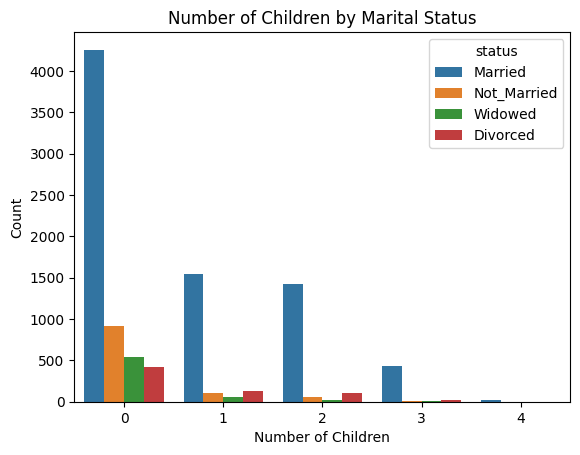

In [ ]:
sns.countplot(x='children', hue='status', data=d)
plt.title('Number of Children by Marital Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

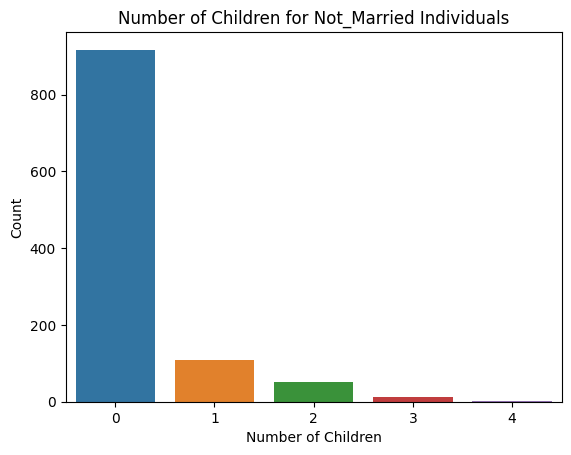

In [ ]:
sns.countplot(x='children', data=d[d['status'] == 'Not_Married'])
plt.title('Number of Children for Not_Married Individuals')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()
# Either Adopted or Kidnapped or ... or idk why

In [ ]:
d.describe()

,children,age_band,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.00000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.647609,46.766133,1977.668390,23.443890,46.368791,27.609436,66.315571,19.174930,32.047099,26.078575,42.33206,6.118311,4.491658,19.115186,1.893109,36.582703,21.697926,32.011916,90.514796
std,0.920958,13.834658,119.190395,50.914268,78.305807,53.977394,95.430009,32.481493,45.392234,84.513952,63.86938,12.855594,9.999811,88.985386,0.308990,42.252513,31.868067,39.103795,107.213244
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,38.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,8.260000,4.670000,8.740000,26.600000
50%,0.000000,48.000000,1988.000000,0.000000,17.970000,0.000000,31.980000,0.510000,14.990000,0.000000,23.48000,0.000000,0.000000,0.000000,2.000000,24.000000,12.980000,21.410000,66.240000
75%,1.000000,58.000000,1994.000000,23.980000,65.450000,34.990000,94.430000,27.470000,46.470000,21.480000,59.94000,5.980000,4.490000,7.980000,2.000000,50.860000,28.380000,43.070000,126.010000
max,4.000000,75.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.27000,156.870000,162.350000,4306.420000,2.000000,1231.090000,1279.100000,1771.160000,4283.560000


In [ ]:
float64_columns = []
for col in d:
    if d[col].dtypes == 'float64':
        float64_columns.append(col)
print(float64_columns)
print(f"\nNumber of columns with dtype float64: {len(float64_columns)}")

['age_band', 'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit', 'Life Insurance', 'Medical Insurance', 'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount', 'Investment in Commudity', 'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance']

Number of columns with dtype float64: 16


In [ ]:
sample_data = d[float64_columns]

In [ ]:
sample_data

,age_band,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,53.0,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43
1,58.0,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78
2,28.0,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78
3,20.0,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70
4,48.0,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,48.0,0.00,0.00,0.00,29.97,6.49,0.00,8.99,7.49,4.49,0.00,0.00,7.29,3.50,9.57,10.23
10151,48.0,0.00,110.95,0.00,200.41,0.00,2.99,0.00,14.99,0.00,0.00,0.00,62.27,3.00,36.40,102.62
10152,43.0,124.93,0.00,54.48,0.00,84.42,0.00,0.00,0.00,0.00,0.00,0.00,52.77,0.00,14.07,76.18
10153,53.0,0.00,35.98,0.00,0.00,0.00,0.00,0.00,9.98,0.00,7.98,0.00,7.20,2.99,1.66,4.79


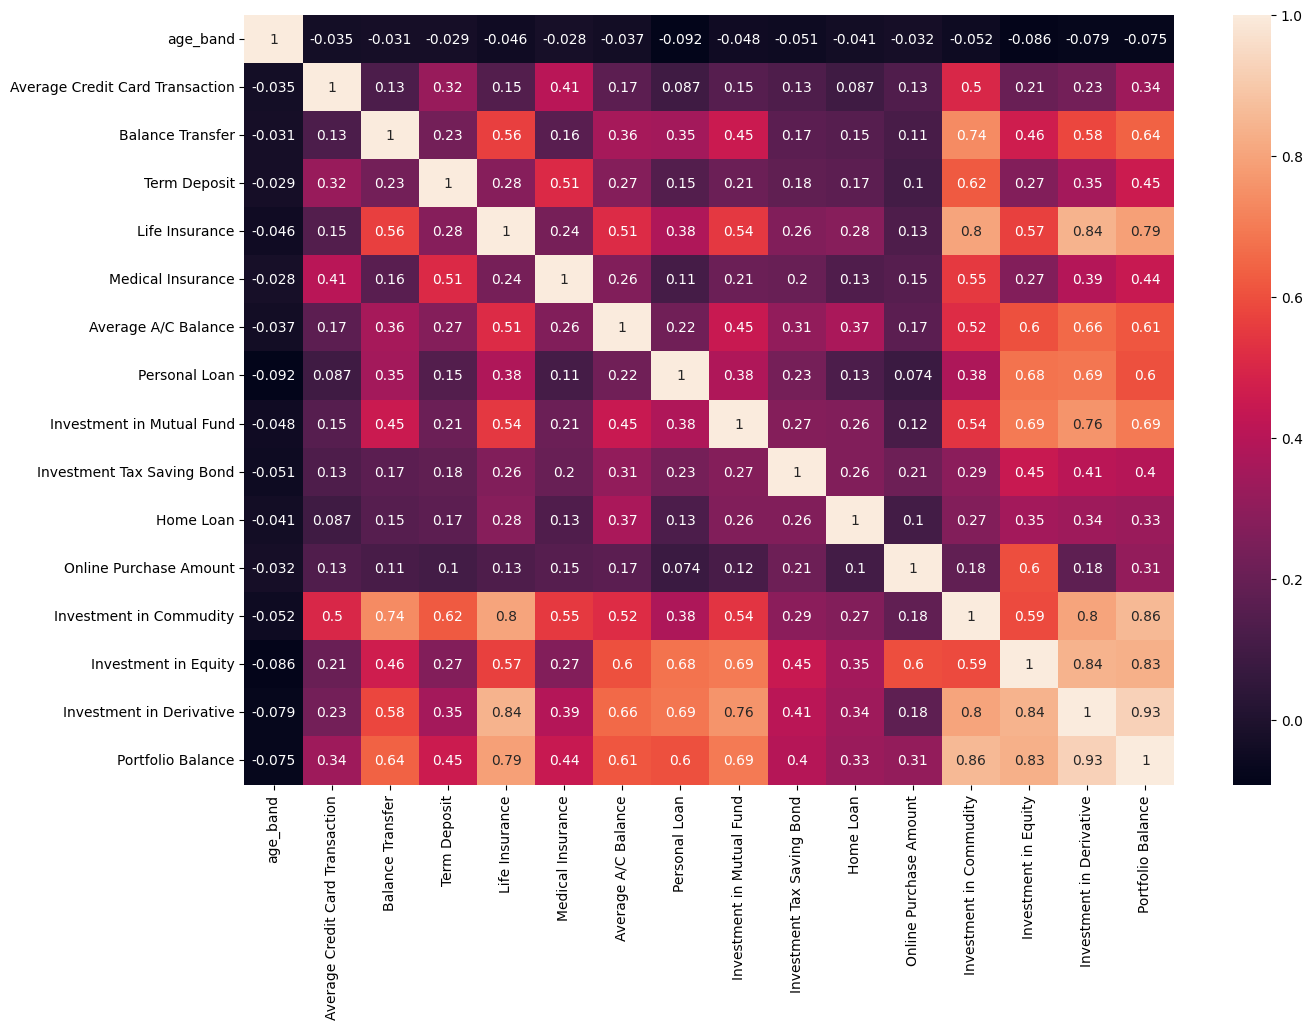

In [ ]:
plt.figure(figsize=(15, 10))
corr_mat = sample_data.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

In [ ]:
# Adjust as needed
threshold = 0.8
for i in range(len(corr_mat.columns)):
    for j in range(i+1, len(corr_mat.columns)):
        if abs(corr_mat.iloc[i, j]) > threshold:
            print(f"High correlation between '{corr_mat.columns[i]}' and '{corr_mat.columns[j]}' : {corr_mat.iloc[i, j]}")

High correlation between 'Life Insurance' and 'Investment in Commudity' : 0.8028644125707282
High correlation between 'Life Insurance' and 'Investment in Derivative' : 0.8391625016746063
High correlation between 'Investment in Commudity' and 'Portfolio Balance' : 0.8576371896374991
High correlation between 'Investment in Equity' and 'Investment in Derivative' : 0.8412891589745608
High correlation between 'Investment in Equity' and 'Portfolio Balance' : 0.8320650846975415
High correlation between 'Investment in Derivative' and 'Portfolio Balance' : 0.9273287300961137


### Before heading forward
---
#### Investment in Commudity (Commodity):
Represents the value of investments in commodities, such as gold, silver, oil, or agricultural products.<br><br>

#### Investment in Equity:
Represents the value of investments in equities or stocks, indicating ownership in companies.<br><br>

#### Investment in Derivative:
Represents the value of investments in financial derivatives, which derive their value from an underlying asset, index, or rate.<br><br>

#### Portfolio Balance:
Represents the overall balance or value of an investment portfolio, which may include various types of investments like stocks, bonds, commodities, and derivatives.

In [ ]:
for col in d:
    if d[col].dtypes == 'object':
        print(col ,d[col].unique())

status ['Married' 'Not_Married' 'Widowed' 'Divorced']
occupation ['Manual Worker' 'Retired' 'Professional' 'Business Manager'
 'Secretarial/Admin' 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Manual Worker' 'Unknown'
 'Professional' 'Business Manager' 'Housewife' 'Student']
home_status ['Own Home' 'Rent from Council/HA' 'Rent Privately' 'Live in Parental Hom'
 'Unclassified']
self_employed ['No' 'Yes']
self_employed_partner ['No' 'Yes']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR'

In [ ]:
d['occupation'].replace({'Manual Worker': 'Labor', 'Business Manager': 'BusinessMan'}, inplace = True)
d['occupation_partner'].replace({'Manual Worker': 'Labor', 'Business Manager': 'BusinessMan'}, inplace = True)
d['home_status'].replace({'Own Home': 'Owner', 'Rent from Council/HA': 'Council_Rent', 'Rent Privately': 'Private_Rent', 'Live in Parental Hom':'Lives_with_parents'}, inplace = True)

#### (Optional)

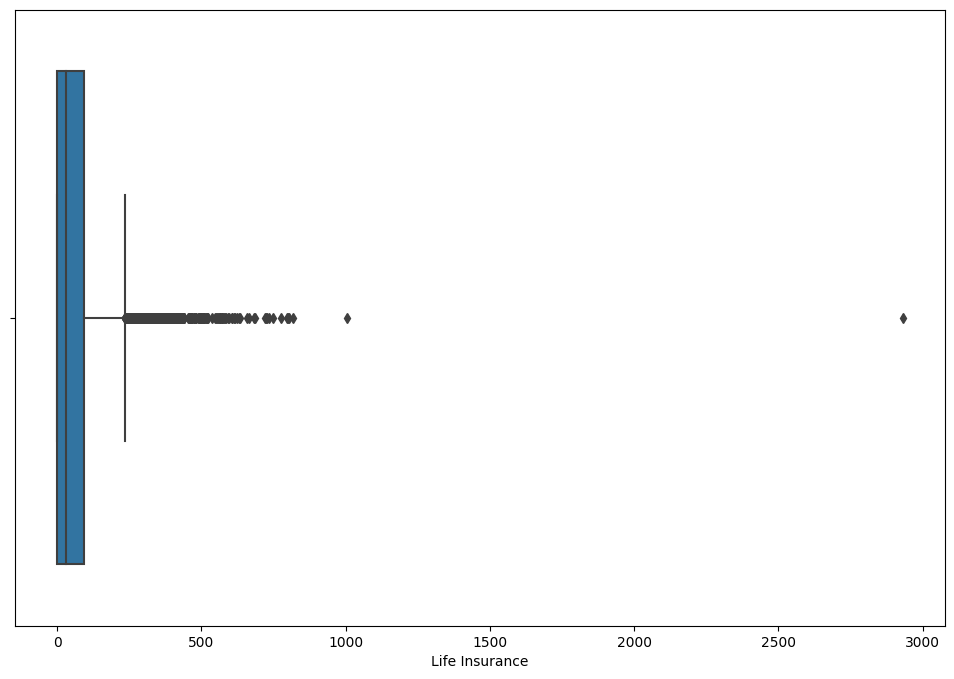

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = sample_data, x = 'Life Insurance')
plt.show()

In [ ]:
lower_bound = sample_data['Life Insurance'].quantile(0.01)
upper_bound = sample_data['Life Insurance'].quantile(0.99)
sample_data['Life Insurance'] = sample_data['Life Insurance'].clip(lower_bound, upper_bound)

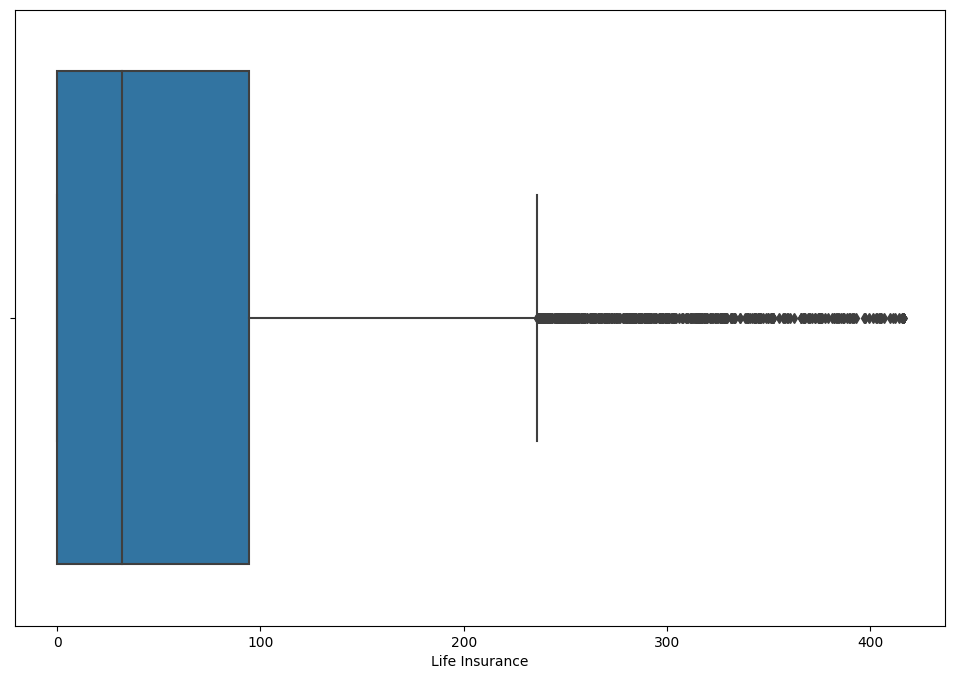

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = sample_data, x = 'Life Insurance')
plt.show()

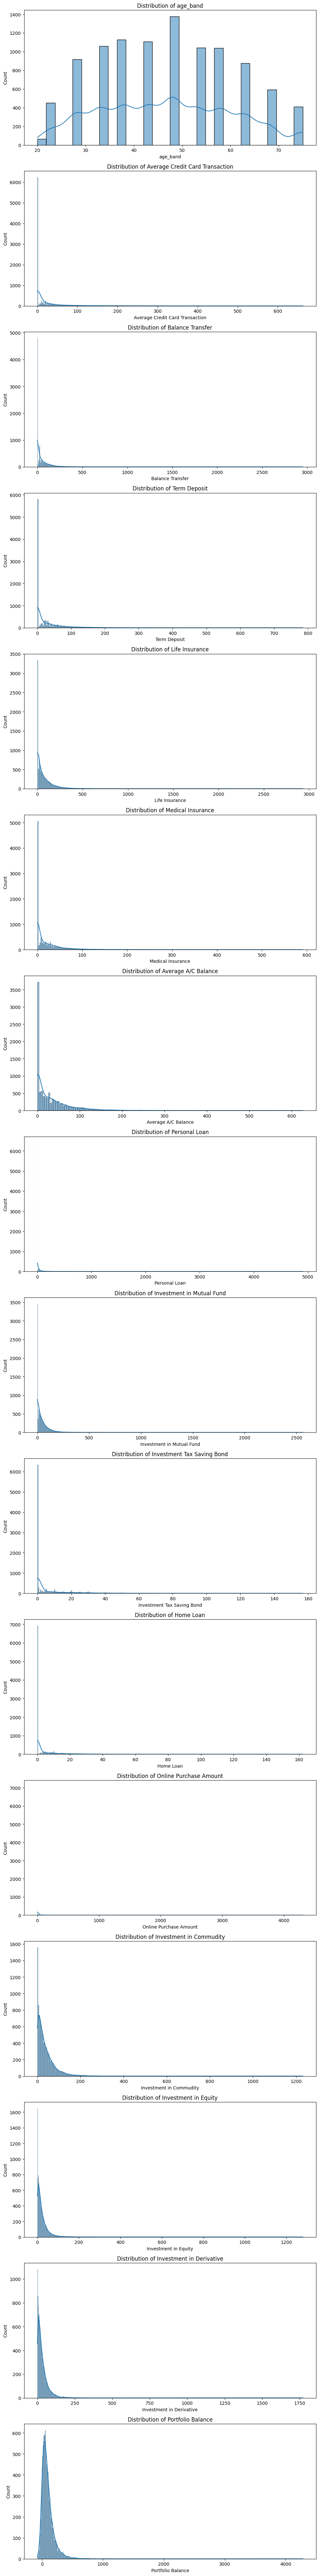

CPU times: user 20 s, sys: 1.84 s, total: 21.8 s
Wall time: 23 s


In [ ]:
%%time
float_columns = d.select_dtypes(include='float64').columns
fig, axes = plt.subplots(nrows=len(float_columns), ncols=1, figsize=(10, 5 * len(float_columns)))
for i, col in enumerate(float_columns):
    sns.histplot(data=d, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew
skewness_threshold = 0.5
cols_trans = []

for col in float64_columns:
    col_skewness = skew(d[col])
    if np.abs(col_skewness) > skewness_threshold:
        print(f"{col} has skewness {col_skewness:.2f} (Transformation recommended)")
        cols_trans.append(col)
    else:
        print(f"{col} has skewness {col_skewness:.2f} (No transformation needed)")
print("\nColumns needing transformation:", cols_trans)
print("Count of columns: ", len(cols_trans))

age_band has skewness 0.13 (No transformation needed)
Average Credit Card Transaction has skewness 3.63 (Transformation recommended)
Balance Transfer has skewness 7.27 (Transformation recommended)
Term Deposit has skewness 4.00 (Transformation recommended)
Life Insurance has skewness 4.92 (Transformation recommended)
Medical Insurance has skewness 3.24 (Transformation recommended)
Average A/C Balance has skewness 2.78 (Transformation recommended)
Personal Loan has skewness 23.13 (Transformation recommended)
Investment in Mutual Fund has skewness 8.45 (Transformation recommended)
Investment Tax Saving Bond has skewness 3.24 (Transformation recommended)
Home Loan has skewness 3.89 (Transformation recommended)
Online Purchase Amount has skewness 20.68 (Transformation recommended)
Investment in Commudity has skewness 4.31 (Transformation recommended)
Investment in Equity has skewness 10.35 (Transformation recommended)
Investment in Derivative has skewness 10.88 (Transformation recommended)

In [ ]:
cols_trans

['Average Credit Card Transaction',
 'Balance Transfer',
 'Term Deposit',
 'Life Insurance',
 'Medical Insurance',
 'Average A/C Balance',
 'Personal Loan',
 'Investment in Mutual Fund',
 'Investment Tax Saving Bond',
 'Home Loan',
 'Online Purchase Amount',
 'Investment in Commudity',
 'Investment in Equity',
 'Investment in Derivative',
 'Portfolio Balance']

In [ ]:
def log_transform_and_plot(df, column):
    original_skewness = skew(df[column])

    # Apply log1p transformation
    df[column + '_transformed'] = np.log1p(df[column])
    transformed_skewness = skew(df[column + '_transformed'])

    # Plot original and transformed distributions
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column} (Original)')
    sns.histplot(df[column + '_transformed'], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {column} (Transformed)')
    plt.show()

    print(f"{column} skewness before transformation: {original_skewness:.2f}")
    print(f"{column} skewness after log1p transformation: {transformed_skewness:.2f}")

    df.drop(column, axis=1, inplace=True)

In [ ]:
data = d.copy()

In [ ]:
d['Portfolio Balance'].isnull().sum()

0

In [ ]:
d['Portfolio Balance'].describe()

count    10057.000000
mean        90.514796
std        107.213244
min        -78.430000
25%         26.600000
50%         66.240000
75%        126.010000
max       4283.560000
Name: Portfolio Balance, dtype: float64

#### Data Transformation

In [ ]:
# Shift to make all values non-negative
# Reason for not using Logp1, because we get Null values after the transformation.
data['Portfolio Balance'] = data['Portfolio Balance'] - data['Portfolio Balance'].min() + 1

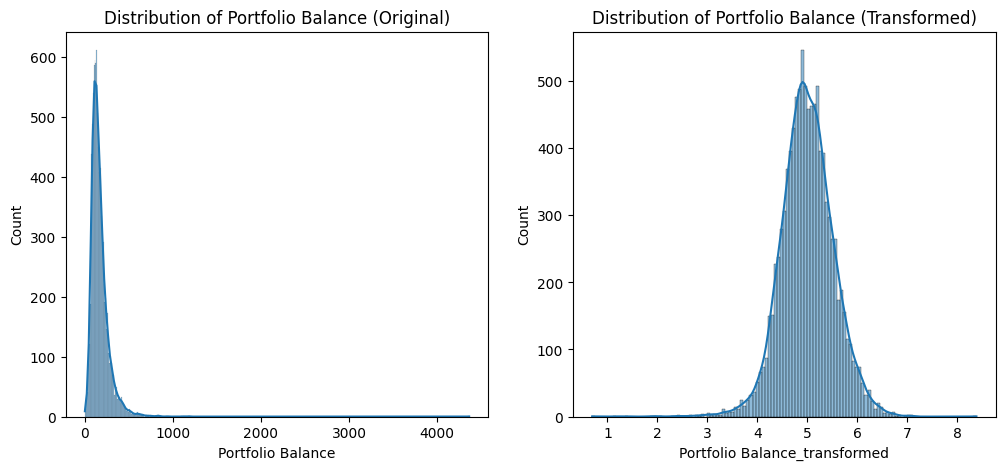

Portfolio Balance skewness before transformation: 7.77
Portfolio Balance skewness after log1p transformation: -0.19


In [ ]:
log_transform_and_plot(data, 'Portfolio Balance')

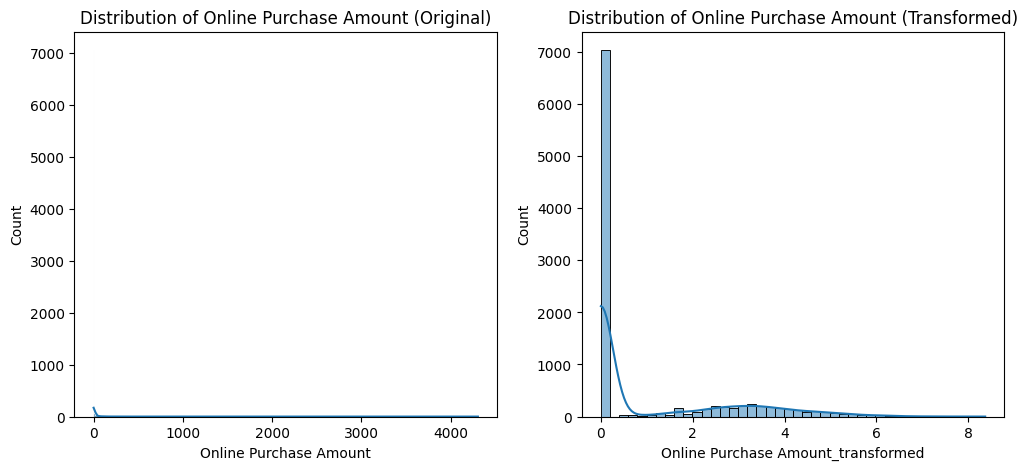

Online Purchase Amount skewness before transformation: 20.68
Online Purchase Amount skewness after log1p transformation: 1.38


In [ ]:
log_transform_and_plot(data, 'Online Purchase Amount')

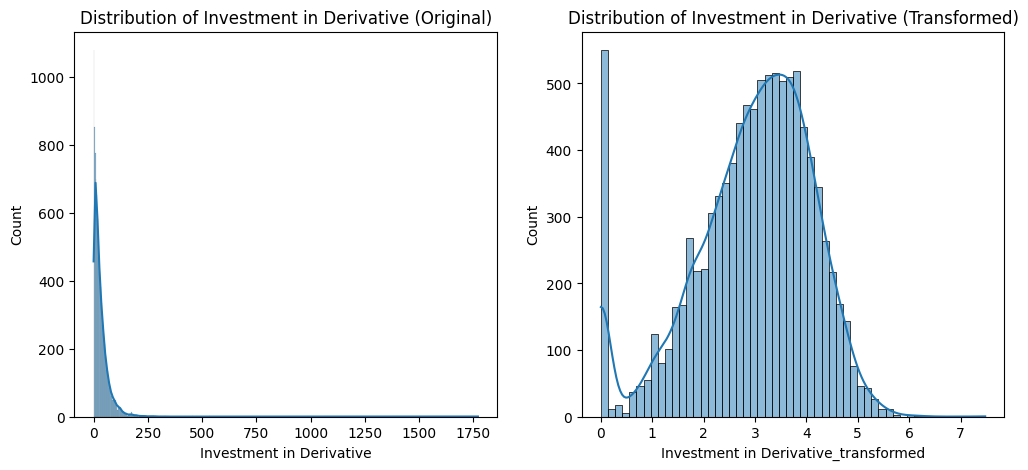

Investment in Derivative skewness before transformation: 10.88
Investment in Derivative skewness after log1p transformation: -0.68


In [ ]:
log_transform_and_plot(data, 'Investment in Derivative')

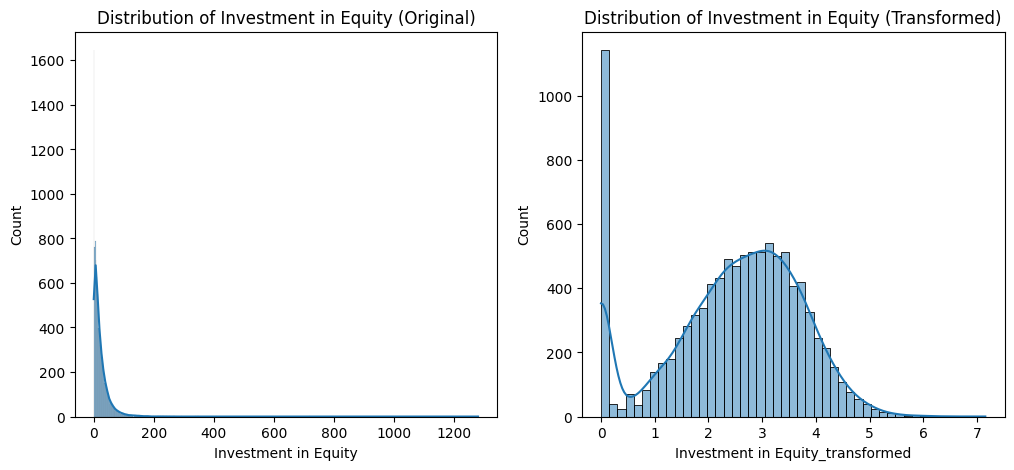

Investment in Equity skewness before transformation: 10.35
Investment in Equity skewness after log1p transformation: -0.44


In [ ]:
log_transform_and_plot(data, 'Investment in Equity')

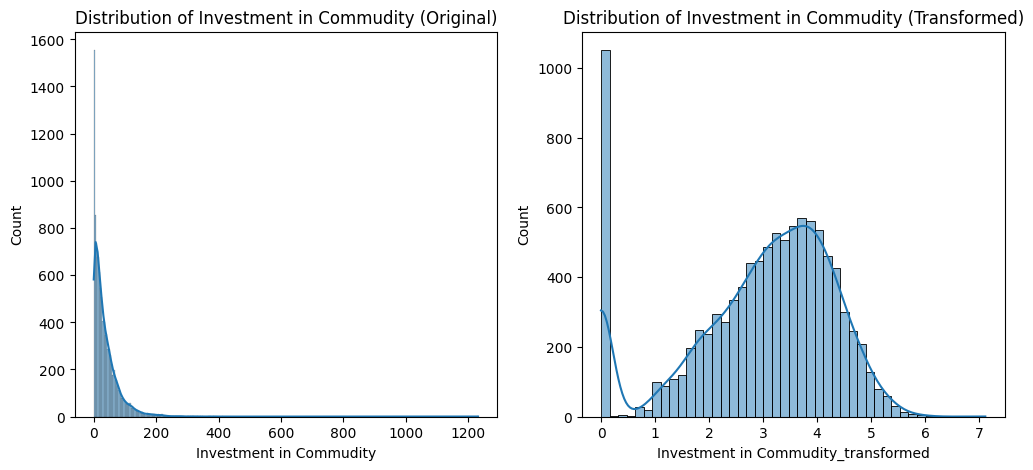

Investment in Commudity skewness before transformation: 4.31
Investment in Commudity skewness after log1p transformation: -0.75


In [ ]:
log_transform_and_plot(data, 'Investment in Commudity')

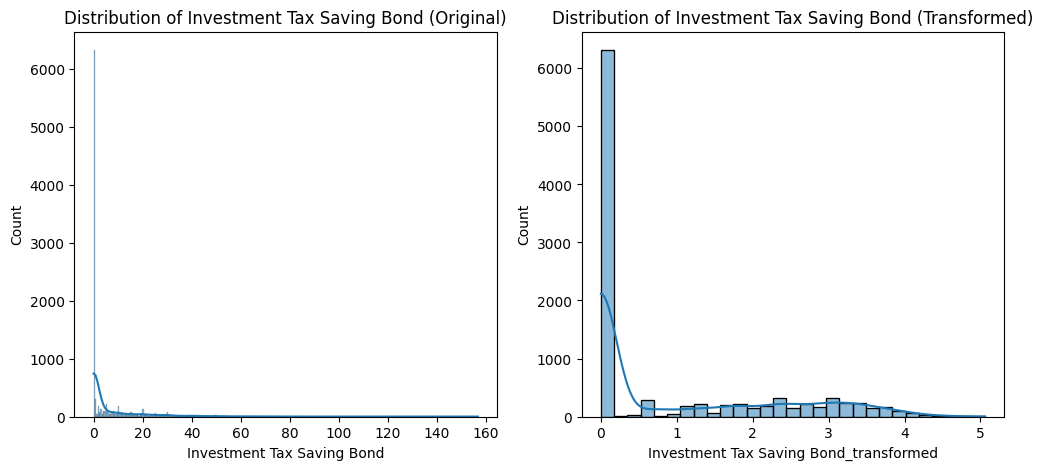

Investment Tax Saving Bond skewness before transformation: 3.24
Investment Tax Saving Bond skewness after log1p transformation: 1.07


In [ ]:
log_transform_and_plot(data, 'Investment Tax Saving Bond')

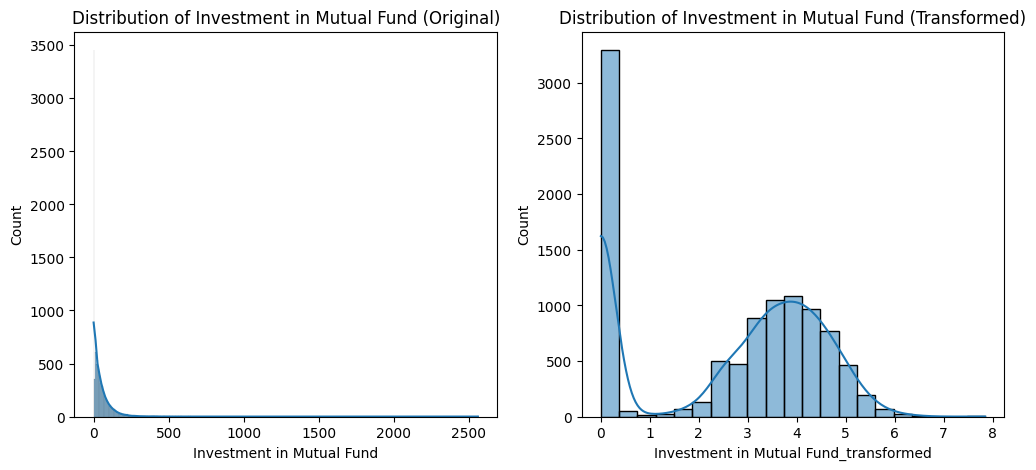

Investment in Mutual Fund skewness before transformation: 8.45
Investment in Mutual Fund skewness after log1p transformation: -0.30


In [ ]:
log_transform_and_plot(data, 'Investment in Mutual Fund')

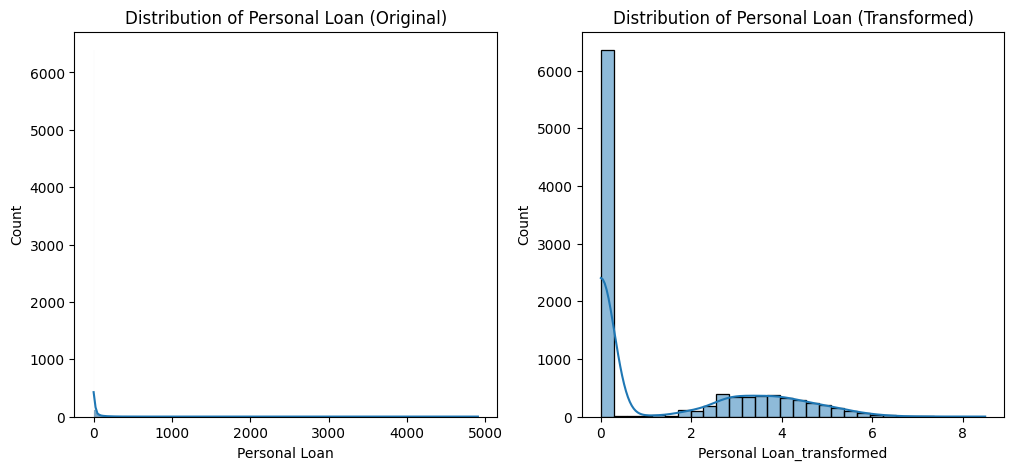

Personal Loan skewness before transformation: 23.13
Personal Loan skewness after log1p transformation: 0.90


In [ ]:
log_transform_and_plot(data, 'Personal Loan')

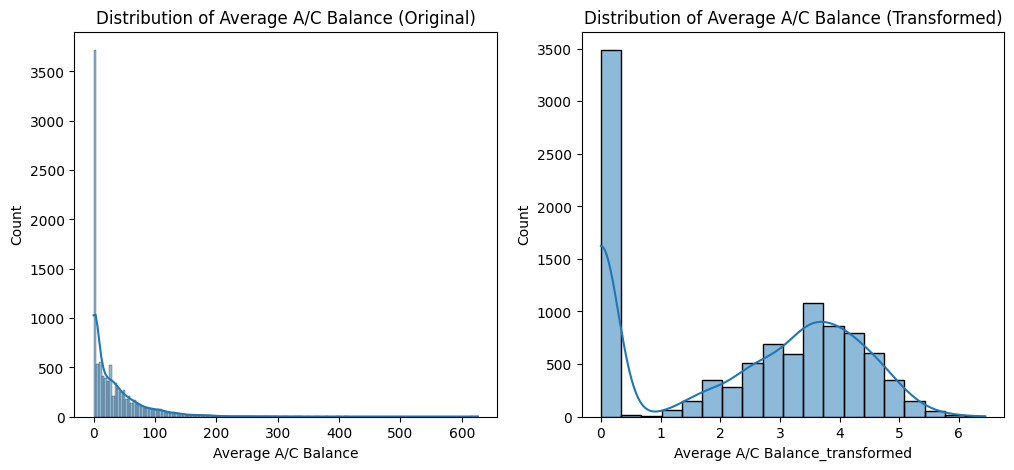

Average A/C Balance skewness before transformation: 2.78
Average A/C Balance skewness after log1p transformation: -0.15


In [ ]:
log_transform_and_plot(data, 'Average A/C Balance')

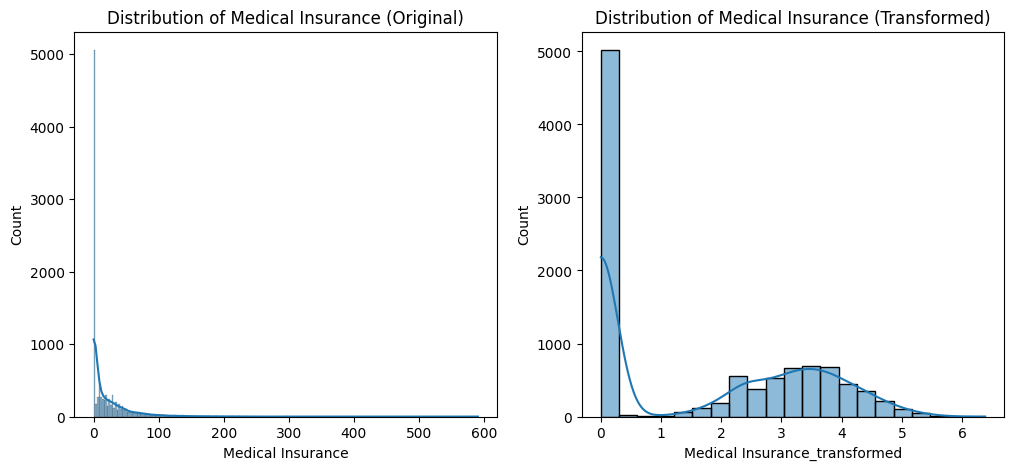

Medical Insurance skewness before transformation: 3.24
Medical Insurance skewness after log1p transformation: 0.33


In [ ]:
log_transform_and_plot(data, 'Medical Insurance')

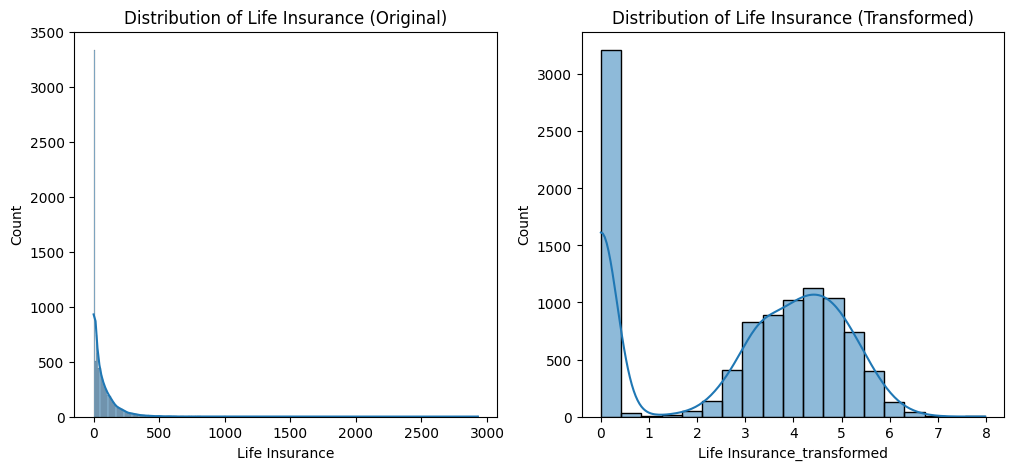

Life Insurance skewness before transformation: 4.92
Life Insurance skewness after log1p transformation: -0.37


In [ ]:
log_transform_and_plot(data, 'Life Insurance')

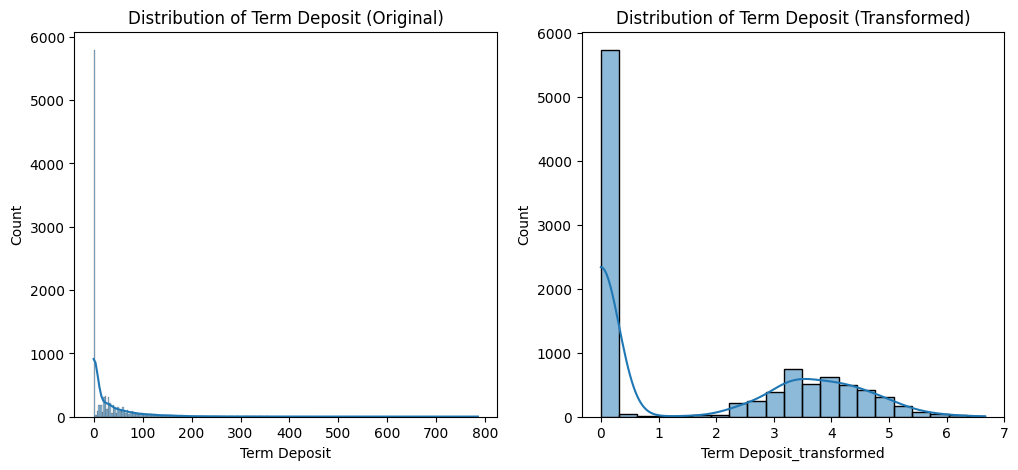

Term Deposit skewness before transformation: 4.00
Term Deposit skewness after log1p transformation: 0.53


In [ ]:
log_transform_and_plot(data, 'Term Deposit')

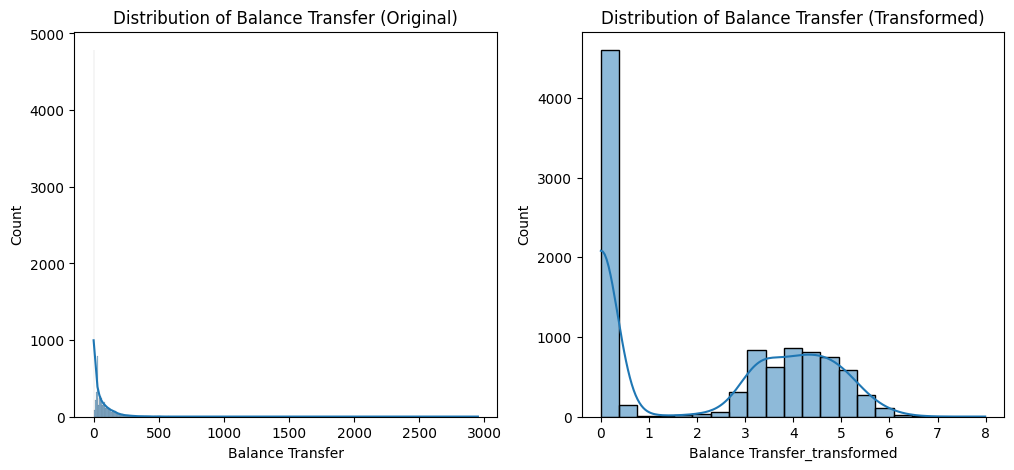

Balance Transfer skewness before transformation: 7.27
Balance Transfer skewness after log1p transformation: 0.12


In [ ]:
log_transform_and_plot(data, 'Balance Transfer')

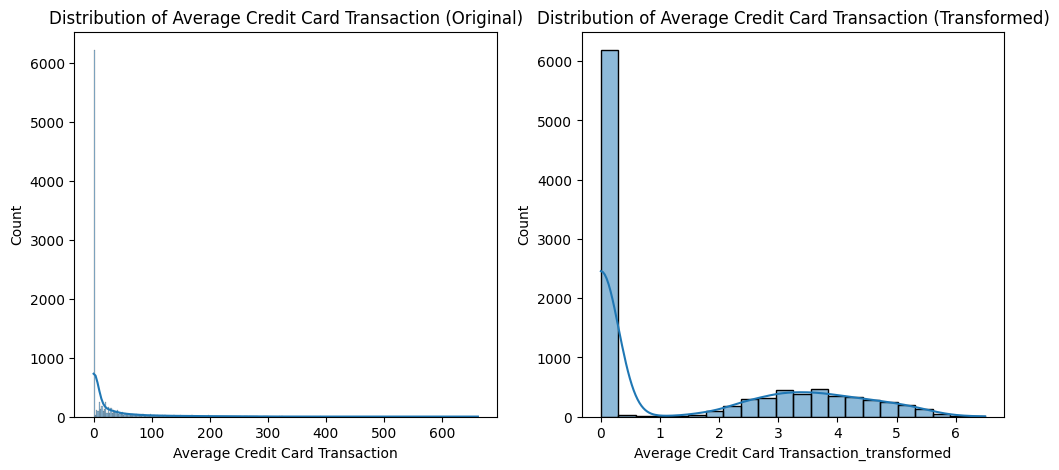

Average Credit Card Transaction skewness before transformation: 3.63
Average Credit Card Transaction skewness after log1p transformation: 0.79


In [ ]:
log_transform_and_plot(data, 'Average Credit Card Transaction')

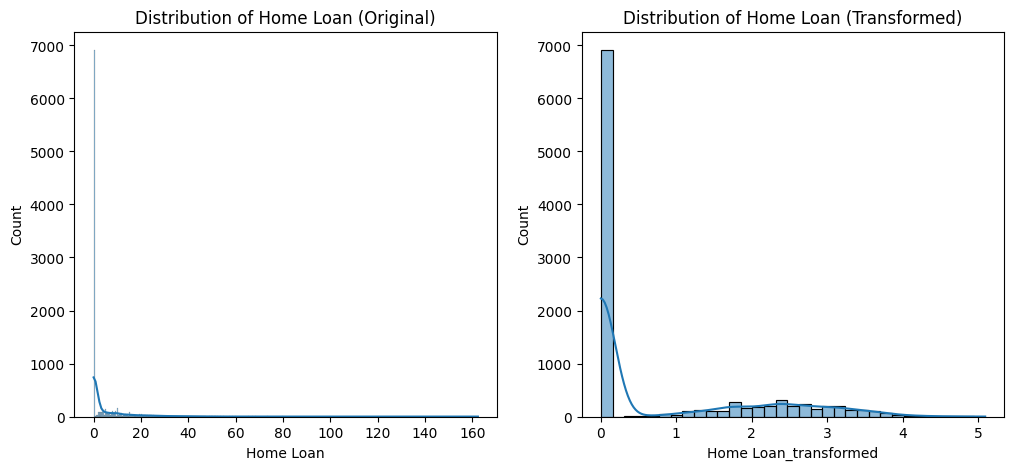

Home Loan skewness before transformation: 3.89
Home Loan skewness after log1p transformation: 1.20


In [ ]:
log_transform_and_plot(data, 'Home Loan')

In [ ]:
data.skew()

children                                        1.167757
age_band                                        0.130738
year_last_moved                               -16.356773
Discount Offering                              -2.544988
Portfolio Balance_transformed                  -0.192353
Online Purchase Amount_transformed              1.381284
Investment in Derivative_transformed           -0.679114
Investment in Equity_transformed               -0.443803
Investment in Commudity_transformed            -0.752501
Investment Tax Saving Bond_transformed          1.071846
Investment in Mutual Fund_transformed          -0.300099
Personal Loan_transformed                       0.895468
Average A/C Balance_transformed                -0.150490
Medical Insurance_transformed                   0.328919
Life Insurance_transformed                     -0.365106
Term Deposit_transformed                        0.529808
Balance Transfer_transformed                    0.123369
Average Credit Card Transaction

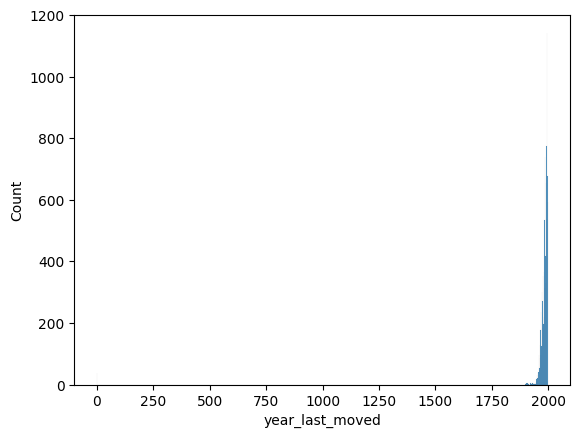

In [ ]:
sns.histplot(data = data, x = 'year_last_moved')
plt.show()

In [ ]:
data['year_last_moved'] = data['year_last_moved'].replace(0, data['year_last_moved'].median())
data.year_last_moved[data.year_last_moved < 1940] = data.year_last_moved.median()

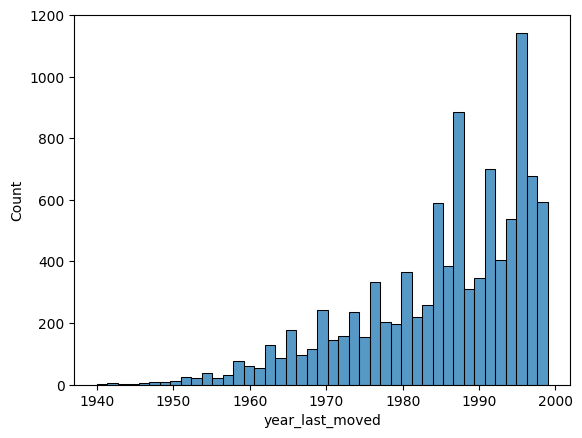

In [ ]:
sns.histplot(data = data, x = 'year_last_moved')
plt.show()

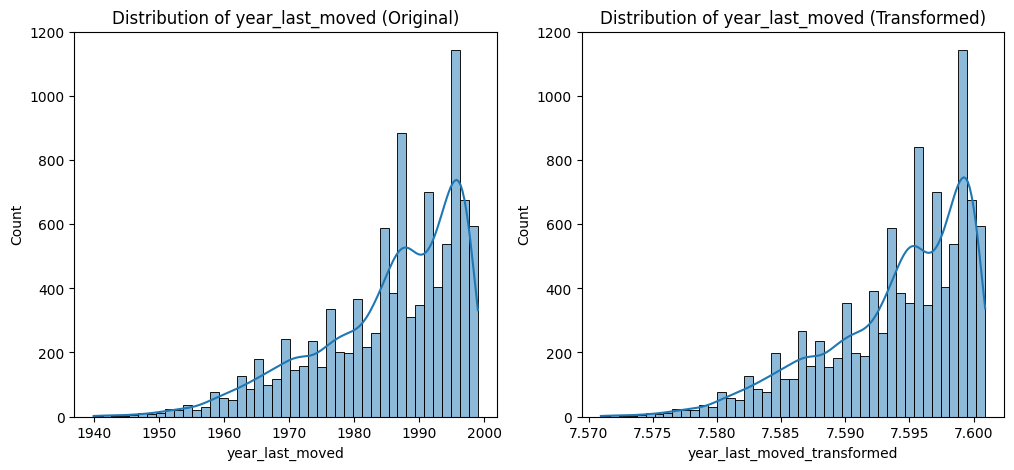

year_last_moved skewness before transformation: -1.00
year_last_moved skewness after log1p transformation: -1.01


In [ ]:
log_transform_and_plot(data, 'year_last_moved')

In [ ]:
f64_cols = []
for col in data:
    if data[col].dtypes == 'float64':
        f64_cols.append(col)
print(f64_cols)
print(f"\nNumber of columns with dtype float64: {len(f64_cols)}")

['age_band', 'Portfolio Balance_transformed', 'Online Purchase Amount_transformed', 'Investment in Derivative_transformed', 'Investment in Equity_transformed', 'Investment in Commudity_transformed', 'Investment Tax Saving Bond_transformed', 'Investment in Mutual Fund_transformed', 'Personal Loan_transformed', 'Average A/C Balance_transformed', 'Medical Insurance_transformed', 'Life Insurance_transformed', 'Term Deposit_transformed', 'Balance Transfer_transformed', 'Average Credit Card Transaction_transformed', 'Home Loan_transformed', 'year_last_moved_transformed']

Number of columns with dtype float64: 17


In [ ]:
data.skew()

children                                       1.167757
age_band                                       0.130738
Discount Offering                             -2.544988
Portfolio Balance_transformed                 -0.192353
Online Purchase Amount_transformed             1.381284
Investment in Derivative_transformed          -0.679114
Investment in Equity_transformed              -0.443803
Investment in Commudity_transformed           -0.752501
Investment Tax Saving Bond_transformed         1.071846
Investment in Mutual Fund_transformed         -0.300099
Personal Loan_transformed                      0.895468
Average A/C Balance_transformed               -0.150490
Medical Insurance_transformed                  0.328919
Life Insurance_transformed                    -0.365106
Term Deposit_transformed                       0.529808
Balance Transfer_transformed                   0.123369
Average Credit Card Transaction_transformed    0.791085
Home Loan_transformed                          1

In [ ]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

status ['Married' 'Not_Married' 'Widowed' 'Divorced']
occupation ['Labor' 'Retired' 'Professional' 'BusinessMan' 'Secretarial/Admin'
 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Labor' 'Unknown' 'Professional'
 'BusinessMan' 'Housewife' 'Student']
home_status ['Owner' 'Council_Rent' 'Private_Rent' 'Lives_with_parents' 'Unclassified']
self_employed ['No' 'Yes']
self_employed_partner ['No' 'Yes']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 

In [ ]:
# Use the lift on TvArea, Occupation, and Occupation_Partner
# CrossTab these with y variable - TvArea and Y, Occupation and Y, Occupation_Partner and Y
# Merge and Convert them to dummies

In [ ]:
data['status'].replace({'Married': 0, 'Not_Married': 1, 'Widowed' : 2, 'Divorced' : 3}, inplace = True)
data['self_employed'].replace({'No': 0, 'Yes':1}, inplace = True)
data['self_employed_partner'].replace({'No': 0, 'Yes':1}, inplace = True)
data['gender'].replace({'Male': 0, 'Female':1}, inplace = True)

In [ ]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

occupation ['Labor' 'Retired' 'Professional' 'BusinessMan' 'Secretarial/Admin'
 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Labor' 'Unknown' 'Professional'
 'BusinessMan' 'Housewife' 'Student']
home_status ['Owner' 'Council_Rent' 'Private_Rent' 'Lives_with_parents' 'Unclassified']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 'DY' 'SM' 'WN' 'CO' 'S6' 'CA' 'S7' 'NW' 'HU' 'HX'
 'DT' 'CW' 'SK' 'GU' 'TW' 'B4' 'SL' 'ME' 'BN' 'WS' 'BA' 'BL' 'LA' 

In [ ]:
# occupation_crosstab = pd.crosstab(data['occupation'], data['Discount Offering'])
# occ_part_crosstab = pd.crosstab(data['occupation_partner'], data['Discount Offering'])
# tvarea_crosstab = pd.crosstab(data['TVarea'], data['Discount Offering'])

In [ ]:
# occupation_crosstab = pd.crosstab(data['occupation'], data['Discount Offering'])
# lift_occupation = occupation_crosstab / occupation_crosstab.sum()
# print("Lift for Occupation:")
# print(lift_occupation)

In [ ]:
# occupation_partner_crosstab = pd.crosstab(d['occupation_partner'], d['Discount Offering'])
# lift_occupation_partner = occupation_partner_crosstab / occupation_partner_crosstab.sum()
# print("\nLift for Occupation_Partner:")
# print(lift_occupation_partner)

In [ ]:
# tvarea_crosstab = pd.crosstab(d['TVarea'], d['Discount Offering'])
# lift_tvarea = tvarea_crosstab / tvarea_crosstab.sum()
# print("\nLift for TVarea:")
# print(lift_tvarea)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10057 entries, 0 to 10154
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   children                                     10057 non-null  int64  
 1   age_band                                     10057 non-null  float64
 2   status                                       10057 non-null  int64  
 3   occupation                                   10057 non-null  object 
 4   occupation_partner                           10057 non-null  object 
 5   home_status                                  10057 non-null  object 
 6   self_employed                                10057 non-null  int64  
 7   self_employed_partner                        10057 non-null  int64  
 8   TVarea                                       10057 non-null  object 
 9   post_code                                    10057 non-null  object 
 10

In [ ]:
data['age_band'] = data['age_band'].astype(int)

In [ ]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

occupation ['Labor' 'Retired' 'Professional' 'BusinessMan' 'Secretarial/Admin'
 'Unknown' 'Housewife' 'Other' 'Student']
occupation_partner ['Secretarial/Admin' 'Retired' 'Other' 'Labor' 'Unknown' 'Professional'
 'BusinessMan' 'Housewife' 'Student']
home_status ['Owner' 'Council_Rent' 'Private_Rent' 'Lives_with_parents' 'Unclassified']
TVarea ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border'
 'Unknown']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 'DY' 'SM' 'WN' 'CO' 'S6' 'CA' 'S7' 'NW' 'HU' 'HX'
 'DT' 'CW' 'SK' 'GU' 'TW' 'B4' 'SL' 'ME' 'BN' 'WS' 'BA' 'BL' 'LA' 

In [ ]:
# Merging Unknown/Other. Why? Think wisely dipshit, while selecting, if someone doesn't know what
# to pick, they'll choose Other (or Unknown, maybe they want their preofession not to be mentioned)
data['occupation'].replace({'Other': 'Other/Unknown', 'Unknown': 'Other/Unknown'}, inplace=True)
data['occupation_partner'].replace({'Other': 'Other/Unknown', 'Unknown': 'Other/Unknown'}, inplace=True)

In [ ]:
occupation_mapping = {
    'Professional': ['Professional', 'BusinessMan'],
    'Service Sector': ['Secretarial/Admin'],
    'Labor': ['Labor'],
    'Retired': ['Retired'],
    'Non-Working': ['Housewife', 'Student'],
    'Other/Unknown': ['Other/Unknown']
}

# Create a new column 'grouped_occupation'
data['occupations'] = data['occupation'].map({v: k for k, values in occupation_mapping.items() for v in values})

In [ ]:
data.occupations.value_counts()

Professional      3160
Retired           2197
Service Sector    1787
Non-Working       1307
Other/Unknown     1053
Labor              553
Name: occupations, dtype: int64

In [ ]:
occupation_partner_mapping = {
    'Professional': ['Professional', 'BusinessMan'],
    'Service Sector': ['Secretarial/Admin'],
    'Labor': ['Labor'],
    'Retired': ['Retired'],
    'Non-Working': ['Housewife', 'Student'],
    'Other/Unknown': ['Other/Unknown']
}

# Create a new column 'grouped_occupation_partner'
data['occupations_partner'] = data['occupation_partner'].map({v: k for k, values in occupation_partner_mapping.items() for v in values})

In [ ]:
data.occupations_partner.value_counts()

Professional      2772
Other/Unknown     2655
Retired           1929
Labor             1499
Service Sector     661
Non-Working        541
Name: occupations_partner, dtype: int64

In [ ]:
data['home_status'].replace({'Unclassified': data['home_status'].mode()[0]}, inplace=True)

### Mapping Regions

In [ ]:
region_mapping = {
    'HTV': 'South West', 'Granada': 'North West', 'Tyne Tees': 'North East', 'Central': 'Midlands',
    'Scottish TV': 'Scotland', 'Anglia': 'East', 'Carlton': 'Midlands', 'Meridian': 'South',
    'Yorkshire': 'Yorkshire', 'Grampian': 'Scotland', 'TV South West': 'South West',
    'Ulster': 'Northern Ireland', 'Border': 'Scotland', 'Unknown': 'Unknown'}

data['TVarea'] = data['TVarea'].map(region_mapping)
data['TVarea'].replace({'Unknown': data['TVarea'].mode()[0]}, inplace=True)

In [ ]:
data['TVarea'].value_counts()

Midlands            3309
South               1211
South West          1198
Yorkshire           1034
North West          1032
Scotland             840
East                 744
North East           531
Northern Ireland     158
Name: TVarea, dtype: int64

In [ ]:
print(data.occupations.value_counts())
print("\n",data.occupations_partner.value_counts())

Professional      3160
Retired           2197
Service Sector    1787
Non-Working       1307
Other/Unknown     1053
Labor              553
Name: occupations, dtype: int64

 Professional      2772
Other/Unknown     2655
Retired           1929
Labor             1499
Service Sector     661
Non-Working        541
Name: occupations_partner, dtype: int64


In [ ]:
cols_drop = ['occupation', 'occupation_partner']
data.drop(columns=cols_drop, axis=1, inplace=True)

In [ ]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

home_status ['Owner' 'Council_Rent' 'Private_Rent' 'Lives_with_parents']
TVarea ['South West' 'North West' 'North East' 'Midlands' 'Scotland' 'East'
 'South' 'Yorkshire' 'Northern Ireland']
post_code ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 'DY' 'SM' 'WN' 'CO' 'S6' 'CA' 'S7' 'NW' 'HU' 'HX'
 'DT' 'CW' 'SK' 'GU' 'TW' 'B4' 'SL' 'ME' 'BN' 'WS' 'BA' 'BL' 'LA' 'SS'
 'BS' 'BD' 'HA' 'L4' 'HD' 'G7' 'M1' 'PL' 'SE' 'SW' 'N1' 'WD' 'M5' 'KT'
 'S3' 'TF' 'SY' 'TD' 'M6' 'S4' 'IG' 'HG' 'SR' 'FY' 'DA' 'IM' 'LU' 'S2'
 'S1' 'M7' 'WR' 'L9' 'UB' 'N2' 'M8' 'ZE' 'B3' 'KW' 'S8' 'G3' 'G8' 'B2'
 'L5' 'DG' 'G4' 'L8' 'L6' 'PH' 'W1' 'JE' 'LD' 'M9' 'GY' 'EC' 'B1' 'WC'
 'G1' 'HS' 'L0']
re

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
dum_cols = pd.get_dummies(data[cat_cols], prefix=cat_cols)
# Concatenate dummy cols with OG cols
data_dummies = pd.concat([data, dum_cols], axis=1)
# Dropping OG cols
data_dummies.drop(columns=cat_cols, inplace=True)

In [ ]:
data_dummies

,children,age_band,status,self_employed,self_employed_partner,Discount Offering,gender,Portfolio Balance_transformed,Online Purchase Amount_transformed,Investment in Derivative_transformed,...,occupations_Other/Unknown,occupations_Professional,occupations_Retired,occupations_Service Sector,occupations_partner_Labor,occupations_partner_Non-Working,occupations_partner_Other/Unknown,occupations_partner_Professional,occupations_partner_Retired,occupations_partner_Service Sector
0,0,53,0,0,0,1,1,5.134975,0.000000,3.506158,...,0,0,0,0,0,0,0,0,0,1
1,0,58,1,0,0,2,1,4.636766,0.000000,1.673351,...,0,0,1,0,0,0,0,0,1,0
2,0,28,1,1,0,2,0,5.530262,0.000000,4.406231,...,0,1,0,0,0,0,1,0,0,0
3,0,20,1,0,0,2,1,3.656614,0.000000,2.921547,...,0,1,0,0,1,0,0,0,0,0
4,0,48,0,0,0,2,1,5.754000,3.295096,4.399867,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,48,0,0,0,2,1,4.507116,0.000000,2.358020,...,0,0,0,1,1,0,0,0,0,0
10151,0,48,0,0,0,2,1,5.209759,0.000000,3.621671,...,0,0,0,0,1,0,0,0,0,0
10152,2,43,0,0,0,2,1,5.053759,0.000000,2.712706,...,0,0,0,0,0,0,0,1,0,0
10153,0,53,0,0,1,2,1,4.445236,0.000000,0.978326,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10057 entries, 0 to 10154
Columns: 215 entries, children to occupations_partner_Service Sector
dtypes: float64(16), int64(7), uint8(192)
memory usage: 3.7 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
data['occupations'] = label_encoder.fit_transform(data['occupations'])
data['occupations_partner'] = label_encoder.fit_transform(data['occupations_partner'])
data['home_status'] = label_encoder.fit_transform(data['home_status'])
data['TVarea'] = label_encoder.fit_transform(data['TVarea'])
data['regions'] = label_encoder.fit_transform(data['regions'])
data['post_code'] = label_encoder.fit_transform(data['post_code'])
# And we added two more cols, it's regions and umm, post_code
# We can either use this approach, or create dummies (one-hot-encoding) (which we already have - data_dummies)
# IF results are shit, like your life, use this approach then. And compare these to know the differences

In [ ]:
# bool_cols = []
# for col in data_dummies:
#     if data_dummies[col].dtypes == 'bool':
#         bool_cols.append(col)

# print(bool_cols)
# None for data_dummies

In [ ]:
# for col in bool_cols:
#     data[col] = data[col].astype(int)

In [ ]:
data.age_band.value_counts()

48    1375
38    1128
43    1107
33    1057
53    1042
58    1036
28     918
63     876
68     594
23     451
75     410
20      63
Name: age_band, dtype: int64

In [ ]:
int_columns = data.select_dtypes(include=['int32', 'int64']).columns
description_int = data[int_columns].describe()
description_int

,children,age_band,status,home_status,self_employed,self_employed_partner,TVarea,post_code,Discount Offering,gender,regions,occupations,occupations_partner
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.647609,46.766133,0.432435,1.951377,0.070796,0.111465,3.601770,77.234265,1.893109,0.754599,6.010242,3.044248,2.504524
std,0.920958,13.834658,0.877905,0.401769,0.256497,0.314722,2.753751,45.816165,0.308990,0.430346,1.992127,1.430688,1.424793
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,2.000000,0.000000,0.000000,1.000000,33.000000,2.000000,1.000000,5.000000,2.000000,2.000000
50%,0.000000,48.000000,0.000000,2.000000,0.000000,0.000000,3.000000,81.000000,2.000000,1.000000,6.000000,3.000000,3.000000
75%,1.000000,58.000000,0.000000,2.000000,0.000000,0.000000,6.000000,113.000000,2.000000,1.000000,8.000000,4.000000,4.000000
max,4.000000,75.000000,3.000000,3.000000,1.000000,1.000000,8.000000,156.000000,2.000000,1.000000,9.000000,5.000000,5.000000


In [ ]:
float_columns = data.select_dtypes(include=['float64']).columns
description_float = data[float_columns].describe()
description_float

,Portfolio Balance_transformed,Online Purchase Amount_transformed,Investment in Derivative_transformed,Investment in Equity_transformed,Investment in Commudity_transformed,Investment Tax Saving Bond_transformed,Investment in Mutual Fund_transformed,Personal Loan_transformed,Average A/C Balance_transformed,Medical Insurance_transformed,Life Insurance_transformed,Term Deposit_transformed,Balance Transfer_transformed,Average Credit Card Transaction_transformed,Home Loan_transformed,year_last_moved_transformed
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,5.001665,1.000245,2.938919,2.458765,2.950040,0.901283,2.532758,1.354570,2.284546,1.659009,2.840970,1.630388,2.189345,1.401015,0.760578,7.594018
std,0.527510,1.668245,1.191493,1.272561,1.376170,1.315703,1.922457,1.890546,1.838953,1.764881,2.094661,1.969802,2.148196,1.879436,1.208328,0.005536
min,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.570959
25%,4.673109,0.000000,2.276241,1.735189,2.225704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.590852
50%,4.988185,0.000000,3.109507,2.637628,3.218876,0.000000,3.197856,0.000000,2.771964,0.412110,3.495901,0.000000,2.942859,0.000000,0.000000,7.595387
75%,5.330010,2.195000,3.785779,3.380314,3.948548,1.943049,4.109890,3.112626,3.860098,3.348851,4.558393,3.583241,4.196450,3.218076,1.702928,7.598399
max,8.381142,8.368094,7.479954,7.154693,7.116467,5.061772,7.848649,8.498404,6.441329,6.383574,7.983239,6.666728,7.990496,6.497167,5.095895,7.600902


In [ ]:
data['age_category'] = pd.cut(data['age_band'], bins=[0, 30, 50, float('inf')], labels=['young', 'middle-aged', 'senior'])
data_dummies['age_category'] = pd.cut(data_dummies['age_band'], bins=[0, 30, 50, float('inf')], labels=['young', 'middle-aged', 'senior'])

In [ ]:
print(data['age_category'].value_counts())
print(f"\n{data_dummies['age_category'].value_counts()}")

middle-aged    4667
senior         3958
young          1432
Name: age_category, dtype: int64

middle-aged    4667
senior         3958
young          1432
Name: age_category, dtype: int64


In [ ]:
data['age_category'] = data['age_category'].replace({'young': 0, 'middle-aged': 1, 'senior': 2})
data_dummies['age_category'] = data_dummies['age_category'].replace({'young': 0, 'middle-aged': 1, 'senior': 2})

In [ ]:
data.drop(columns = 'age_band', axis = 1, inplace = True)
data_dummies.drop(columns = 'age_band', axis = 1, inplace = True)

In [ ]:
print(data['age_category'].value_counts())
print(f"\n{data_dummies['age_category'].value_counts()}")

1    4667
2    3958
0    1432
Name: age_category, dtype: int64

1    4667
2    3958
0    1432
Name: age_category, dtype: int64


In [ ]:
# Convert 'age_category' to integer dtype for both data
data['age_category'] = data['age_category'].astype(int)
data_dummies['age_category'] = data_dummies['age_category'].astype(int)

In [ ]:
data2 = data.copy()
d2_dummies = data_dummies.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# For non one-hot-encoded data
scaler = MinMaxScaler()
data2[float_columns] = scaler.fit_transform(data2[float_columns])
# For one-hoe-encoded data
d2_dummies[float_columns] = scaler.fit_transform(d2_dummies[float_columns])

In [ ]:
int_columns = data2.select_dtypes(include=['int32', 'int64']).columns
description_int = data2[int_columns].describe()
description_int

,children,status,home_status,self_employed,self_employed_partner,TVarea,post_code,Discount Offering,gender,regions,occupations,occupations_partner,age_category
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.647609,0.432435,1.951377,0.070796,0.111465,3.601770,77.234265,1.893109,0.754599,6.010242,3.044248,2.504524,1.251168
std,0.920958,0.877905,0.401769,0.256497,0.314722,2.753751,45.816165,0.308990,0.430346,1.992127,1.430688,1.424793,0.687682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,33.000000,2.000000,1.000000,5.000000,2.000000,2.000000,1.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,81.000000,2.000000,1.000000,6.000000,3.000000,3.000000,1.000000
75%,1.000000,0.000000,2.000000,0.000000,0.000000,6.000000,113.000000,2.000000,1.000000,8.000000,4.000000,4.000000,2.000000
max,4.000000,3.000000,3.000000,1.000000,1.000000,8.000000,156.000000,2.000000,1.000000,9.000000,5.000000,5.000000,2.000000


In [ ]:
float_columns = data2.select_dtypes(include=['float64']).columns
description_float = data2[float_columns].describe()
description_float

,Portfolio Balance_transformed,Online Purchase Amount_transformed,Investment in Derivative_transformed,Investment in Equity_transformed,Investment in Commudity_transformed,Investment Tax Saving Bond_transformed,Investment in Mutual Fund_transformed,Personal Loan_transformed,Average A/C Balance_transformed,Medical Insurance_transformed,Life Insurance_transformed,Term Deposit_transformed,Balance Transfer_transformed,Average Credit Card Transaction_transformed,Home Loan_transformed,year_last_moved_transformed
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.560421,0.119531,0.392906,0.343658,0.414537,0.178057,0.322700,0.159391,0.354670,0.259887,0.355867,0.244556,0.273994,0.215635,0.149253,0.770101
std,0.068615,0.199358,0.159291,0.177864,0.193378,0.259929,0.244941,0.222459,0.285493,0.276472,0.262382,0.295468,0.268844,0.289270,0.237118,0.184890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.517685,0.000000,0.304312,0.242525,0.312754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.664361
50%,0.558668,0.000000,0.415712,0.368657,0.452314,0.000000,0.407440,0.000000,0.430340,0.064558,0.437905,0.000000,0.368295,0.000000,0.000000,0.815816
75%,0.603130,0.262306,0.506123,0.472461,0.554847,0.383867,0.523643,0.366260,0.599270,0.524604,0.570995,0.537481,0.525180,0.495304,0.334176,0.916406
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data description for d2_dummies

In [ ]:
int_columns = d2_dummies.select_dtypes(include=['int32', 'int64']).columns
description_int = d2_dummies[int_columns].describe()
description_int

,children,status,self_employed,self_employed_partner,Discount Offering,gender,age_category
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.647609,0.432435,0.070796,0.111465,1.893109,0.754599,1.251168
std,0.920958,0.877905,0.256497,0.314722,0.308990,0.430346,0.687682
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000
max,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000


In [ ]:
float_columns = d2_dummies.select_dtypes(include=['float64']).columns
description_float = d2_dummies[float_columns].describe()
description_float

,Portfolio Balance_transformed,Online Purchase Amount_transformed,Investment in Derivative_transformed,Investment in Equity_transformed,Investment in Commudity_transformed,Investment Tax Saving Bond_transformed,Investment in Mutual Fund_transformed,Personal Loan_transformed,Average A/C Balance_transformed,Medical Insurance_transformed,Life Insurance_transformed,Term Deposit_transformed,Balance Transfer_transformed,Average Credit Card Transaction_transformed,Home Loan_transformed,year_last_moved_transformed
count,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000,10057.000000
mean,0.560421,0.119531,0.392906,0.343658,0.414537,0.178057,0.322700,0.159391,0.354670,0.259887,0.355867,0.244556,0.273994,0.215635,0.149253,0.770101
std,0.068615,0.199358,0.159291,0.177864,0.193378,0.259929,0.244941,0.222459,0.285493,0.276472,0.262382,0.295468,0.268844,0.289270,0.237118,0.184890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.517685,0.000000,0.304312,0.242525,0.312754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.664361
50%,0.558668,0.000000,0.415712,0.368657,0.452314,0.000000,0.407440,0.000000,0.430340,0.064558,0.437905,0.000000,0.368295,0.000000,0.000000,0.815816
75%,0.603130,0.262306,0.506123,0.472461,0.554847,0.383867,0.523643,0.366260,0.599270,0.524604,0.570995,0.537481,0.525180,0.495304,0.334176,0.916406
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
d2_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10057 entries, 0 to 10154
Columns: 215 entries, children to age_category
dtypes: float64(16), int64(7), uint8(192)
memory usage: 3.7 MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10057 entries, 0 to 10154
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   children                                     10057 non-null  int64  
 1   status                                       10057 non-null  int64  
 2   home_status                                  10057 non-null  int64  
 3   self_employed                                10057 non-null  int64  
 4   self_employed_partner                        10057 non-null  int64  
 5   TVarea                                       10057 non-null  int64  
 6   post_code                                    10057 non-null  int64  
 7   Discount Offering                            10057 non-null  int64  
 8   gender                                       10057 non-null  int64  
 9   regions                                      10057 non-null  int64  
 10

In [ ]:
unknown_counts = {}

print("Unknown and Unclassified Counts for data2")

for column in data2.columns:
    unknown_count = data2[data2[column].isin(['Unknown', 'Unclassified'])].shape[0]
    if unknown_count > 0:
        unknown_counts[column] = unknown_count
        print(f"{column}: {unknown_count}")

# If you want to print a message when there are no unknown or unclassified values
if not unknown_counts:
    print("No unknown or unclassified values found in any column.")

Unknown and Unclassified Counts for data2
No unknown or unclassified values found in any column.


In [ ]:
null_sum = data2.isnull().sum()
null_count = null_sum.sum()
print(null_count)
null_sum1 = d2_dummies.isnull().sum()
null_count1 = null_sum1.sum()
print(null_count1)

0
0


In [ ]:
print(data2['Discount Offering'].unique())
print(d2_dummies['Discount Offering'].unique())

[1 2]
[1 2]


In [ ]:
mapping_dict = {1: 0, 2: 1}
data2['Discount Offering'] = data2['Discount Offering'].map(mapping_dict)
d2_dummies['Discount Offering'] = d2_dummies['Discount Offering'].map(mapping_dict)

### Data-Split / Training / Testing

In [ ]:
# X = data2.drop('Discount Offering', axis = 1)
# y = data2['Discount Offering']
X = d2_dummies.drop('Discount Offering', axis = 1)
y = d2_dummies['Discount Offering']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def get_recall_score(model):

    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    res1 = print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    res2 = print("Recall on test set :", metrics.recall_score(y_test, pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', class_weight = {0: 0.11, 1: 0.89}, random_state=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score1 = get_recall_score(model)
print(f"\n{rec_score1}")

Accuracy: 94.47%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       279
           1       0.97      0.97      0.97      2739

    accuracy                           0.94      3018
   macro avg       0.83      0.85      0.84      3018
weighted avg       0.95      0.94      0.95      3018

Recall on training set :  1.0
Recall on test set : 0.9660460021905805

None


In [ ]:
# max_depth - splits the nodes till a certain range
# Suppose, range is 1-10, it will divide the roots in the given range
# Grid-search is a method to determine the best parameters of an algorithm against a scoring metric

### Hyper-Parameter Tuning (WIP)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
hp_tuned_dt = random_search.best_estimator_
accuracy_random = hp_tuned_dt.score(X_test, y_test)
print("Accuracy on Test Set (Random Search):", accuracy_random)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}
Accuracy on Test Set (Random Search): 0.9135188866799204


In [ ]:
hp_tuned_dt.fit(X_train, y_train)
y_pred = hp_tuned_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score2 = get_recall_score(hp_tuned_dt)
print(f"\n{rec_score2}")

Accuracy: 91.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.16      0.26       279
           1       0.92      0.99      0.95      2739

    accuracy                           0.91      3018
   macro avg       0.77      0.58      0.61      3018
weighted avg       0.89      0.91      0.89      3018

Recall on training set :  1.0
Recall on test set : 0.9897772909821103

None


### Types of Pruning
---
#### Pre-Pruning
- Stop the tree's growth early
#### Post-Pruning
- Pruning the tree, after it's fully grown
#### Cost Complexity Pruning
- CCP is the method of post-pruning that aims to find the right level of complexity for decision tree.
- It simplifies the tree step-by-step

- Imagine the decision tree as a chain, and the "weakest link" is the part of the tree that, if removed, would simplify the tree the most.
- We want to find the right amount of pruning (effective alpha) so that the tree is not too complex (overfitting) but still accurate.
- The pruning process starts with a fully grown tree.
- As we increase alpha, more parts of the tree are pruned.
- Pruning removes unnecessary details and makes the tree simpler.
<br><br>
We choose the alpha value that gives us a reasonably accurate tree without being too complex.
Too much pruning (high alpha) can make the tree too simple, and too little pruning (low alpha) can make it too complex.

In [ ]:
# When Observed more accumulation, chacnes are the model might overfit
# clf = DecisionTreeClassifier(random_state=1, class_weight={1: 0.11, 2: 0.89})
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Cost_Complexity_Pruning Path
# CCP_alpha - least impurites,
ccp_alphas, impurities = path.ccp_alphas, path.impurities

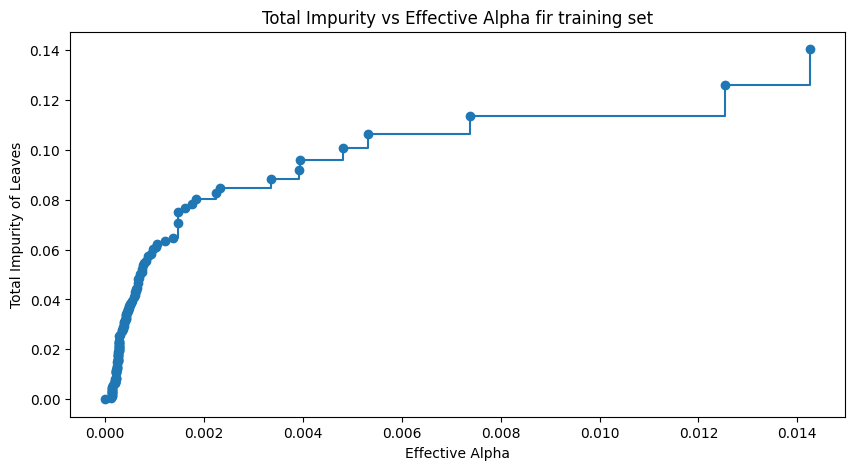

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha fir training set")
plt.show()
# Identify the region where the total impurity decreases.
# You are looking for a point where the impurity starts to level off.
# You might want to choose the smallest ccp_alpha that is in this region.

We train decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree - CLFS[-1] with one node

In [ ]:
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha = i)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, round(ccp_alphas[-1], 4)))

Number of nodes in last tree is: 1 with ccp_alpha: 0.0603


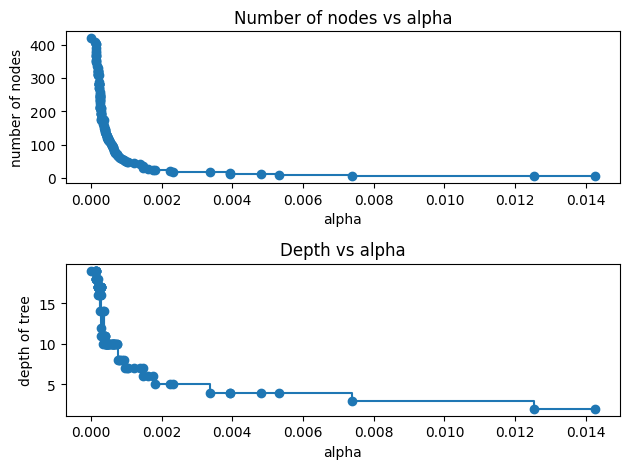

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

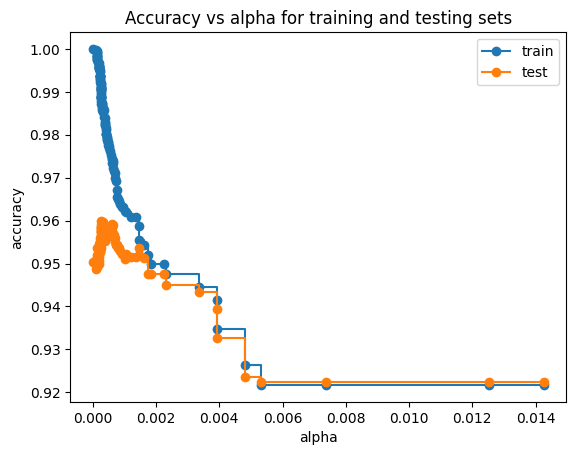

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
# Read the data from right to left
# Choose a range where data point of Train and Test is close to each other

In [ ]:
import numpy as np

values_between = np.arange(0.001, 0.006, 0.0001)
print(values_between)

[0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019
 0.002  0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029
 0.003  0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039
 0.004  0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049
 0.005  0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057 0.0058 0.0059]


In [ ]:
recall_train = []

for clf in clfs:
    pred_train3 = clf.predict(X_train)
    value_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(value_train)

In [ ]:
recall_test = []

for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

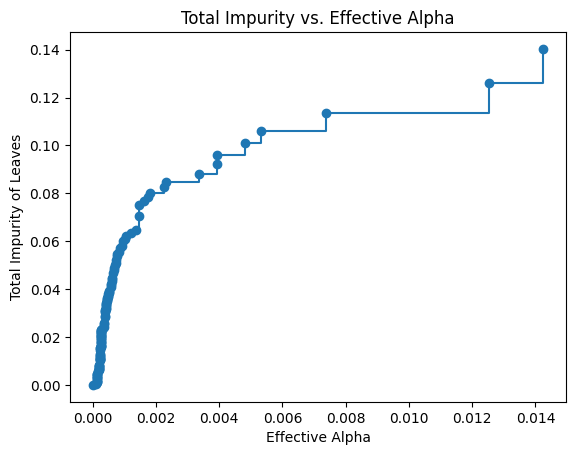

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs. Effective Alpha")
plt.show()

Perform cross-validation to evaluate the performance of the model for different values of ccp_alpha. This helps ensure that the chosen ccp_alpha generalizes well to unseen data.

In [ ]:
ccp_tuned_dt = DecisionTreeClassifier(ccp_alpha =0.001)
ccp_tuned_dt.fit(X_train, y_train)
rec_score3 = get_recall_score(ccp_tuned_dt)
print(f"\n{rec_score3}")
# SHAP

Recall on training set :  0.9785359602755086
Recall on test set : 0.9707922599488864

None


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
rec_score4 = get_recall_score(grad_model)
print(f"\n{rec_score4}")

Recall on training set :  0.9937530033637674
Recall on test set : 0.9843008397225265

None


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
gb_clf = GradientBoostingClassifier()

# Define the parameter grid to search
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2 - 0.01),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
tuned_grad_model = random_search.best_estimator_
y_pred = tuned_grad_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Validation Accuracy:", accuracy)
rec_score5 = get_recall_score(tuned_grad_model)
print(f"\n{rec_score5}")

Best Parameters: {'learning_rate': 0.13164201480914087, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 189, 'subsample': 0.8}
Validation Accuracy: 0.9764744864148442
Recall on training set :  1.0
Recall on test set : 0.9875867104782767

None


In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier(criterion='gini')

# Create a Bagging Classifier without class weights
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators = 50, max_samples = 0.8, oob_score = True)
bagging_classifier.fit(X_train, y_train)
print(f"Out of Bag score: {bagging_classifier.oob_score_}")
print("\n")
rec_score6 = get_recall_score(bagging_classifier)
print(f"\n{rec_score6}")
# A high OOB score indicates that the bagging classifier is performing well on unseen instances during training.

Out of Bag score: 0.9589430316806364


Recall on training set :  0.9995194617972128
Recall on test set : 0.9839357429718876

None


#### Gini
- n_e = 100
- Recall on training set :  0.9996796411981419
- Recall on test set : 0.9843008397225265
<br><br>
- n_e = 125
- Recall on training set :  0.999839820599071
- Recall on test set : 0.9853961299744433
<br><br>
- n_e = 150
- Recall on training set :  0.999839820599071
- Recall on test set : 0.9850310332238043
<br><br>
- n_e = 200
- Recall on training set :  1.0
- Recall on test set : 0.9864914202263599

#### Entropy
- n_e = 100
- Recall on training set :  1.0
- Recall on test set : 0.9839357429718876
<br><br>
- n_e = 150
- Recall on training set :  1.0
- Recall on test set : 0.9839357429718876

#### GridSearch (for bagging)

In [ ]:
param_dist = {
    'n_estimators': randint(50, 150),
    'max_samples': [0.5, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.7, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

# Adjust the number of iterations (n_iter) based on your preference
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, oob_score=True, random_state=42)
random_search = RandomizedSearchCV(bagging_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='recall', n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
bagging_classifier_tuned = random_search.best_estimator_

y_pred_random = bagging_classifier_tuned.predict(X_test)
recall_random = recall_score(y_test, y_pred_random)
print("Best Parameters (Random Search):", best_params_random)
rec_score7 = get_recall_score(bagging_classifier_tuned)
print(f"\n{rec_score7}")

Best Parameters (Random Search): {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 62}
Recall on training set :  1.0
Recall on test set : 0.9989047097480832

None


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=150, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score8 = get_recall_score(adaboost_model)
print(f"\n{rec_score8}")

Accuracy: 95.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       279
           1       0.97      0.98      0.98      2739

    accuracy                           0.95      3018
   macro avg       0.87      0.85      0.86      3018
weighted avg       0.95      0.95      0.95      3018

Recall on training set :  0.9868652891238187
Recall on test set : 0.9780941949616648

None


In [ ]:
param_dist_adaboost = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 1.0),
    'algorithm': ['SAMME', 'SAMME.R'],
}

base_classifier_adaboost = DecisionTreeClassifier(criterion='entropy')
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier_adaboost)
random_search_adaboost = RandomizedSearchCV(adaboost_classifier, param_distributions=param_dist_adaboost, n_iter=20, cv=5, scoring='recall', n_jobs=-1, random_state=1)
random_search_adaboost.fit(X_train, y_train)
best_params_adaboost = random_search_adaboost.best_params_
adaboost_classifier_tuned = random_search_adaboost.best_estimator_

y_pred_adaboost = adaboost_classifier_tuned.predict(X_test)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
print("Best Parameters (AdaBoost - Random Search):", best_params_adaboost)
rec_score9 = get_recall_score(adaboost_classifier_tuned)
print(rec_score9)

Best Parameters (AdaBoost - Random Search): {'algorithm': 'SAMME.R', 'learning_rate': 1.0071848109388686, 'n_estimators': 122}
Recall on training set :  1.0
Recall on test set : 0.9718875502008032
None


In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': randint(50, 201),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', {0: 0.11, 1: 0.89}],
    'criterion': ['gini', 'entropy'],
}

rf_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='recall', random_state=1, n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
rf_model_tuned = random_search.best_estimator_
y_pred_random = rf_model_tuned.predict(X_test)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random))
rec_score10 = get_recall_score(rf_model_tuned)
print(f"\n{rec_score10}")

Best Parameters: {'class_weight': {0: 0.11, 1: 0.89}, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 189}
Recall on training set :  1.0
Recall on test set : 1.0

None


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score11 = get_recall_score(rf_classifier)
print(f"\n{rec_score11}")

Accuracy: 95.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73       279
           1       0.96      1.00      0.98      2739

    accuracy                           0.96      3018
   macro avg       0.95      0.80      0.86      3018
weighted avg       0.96      0.96      0.96      3018

Recall on training set :  1.0
Recall on test set : 0.9967141292442497

None


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score12 = get_recall_score(xgb_classifier)
print(f"\n{rec_score12}")

Accuracy: 97.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       279
           1       0.99      0.99      0.99      2739

    accuracy                           0.98      3018
   macro avg       0.93      0.92      0.93      3018
weighted avg       0.98      0.98      0.98      3018

Recall on training set :  1.0
Recall on test set : 0.9875867104782767

None


In [ ]:
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'colsample_bylevel': uniform(0.5, 0.5),
    'gamma': uniform(0, 1)
}

random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
xgb_model_tuned = random_search.best_estimator_
y_pred_xgb = xgb_model_tuned.predict(X_test)
print(f"\nAccuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
rec_score13 = get_recall_score(xgb_model_tuned)
print(f"\n{rec_score13}")

Best Parameters: {'colsample_bylevel': 0.5078182033705969, 'colsample_bytree': 0.7117007403531848, 'gamma': 0.3948815181755697, 'learning_rate': 0.09804645241541143, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 130, 'subsample': 0.855670976374325}

Accuracy: 97.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       279
           1       0.98      0.99      0.98      2739

    accuracy                           0.97      3018
   macro avg       0.93      0.90      0.91      3018
weighted avg       0.97      0.97      0.97      3018

Recall on training set :  1.0
Recall on test set : 0.9883169039795546

None


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

metrics_df = pd.DataFrame(columns=['Model', 'Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1', 'Train_Accuracy', 'Test_Accuracy'])

def append_metrics(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)

    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)

    train_f1 = f1_score(y_train, train_preds)
    test_f1 = f1_score(y_test, test_preds)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    metrics_df.loc[len(metrics_df)] = [model_name, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1, train_accuracy, test_accuracy]

models = [model, hp_tuned_dt, ccp_tuned_dt, grad_model, tuned_grad_model, bagging_classifier,
          bagging_classifier_tuned, adaboost_model, adaboost_classifier_tuned, rf_classifier, rf_model_tuned, xgb_classifier, xgb_model_tuned]

model_names = ['Decision-Tree', 'Decision-Tree (Tuned)', 'Decision-Tree (CCP-Tuned)', 'Gradient-Boosting', 'Gradient-Boosting (Tuned)', 'Bagging',
               'Bagging (Tuned)', 'AdaBoost','AdaBoost (Tuned)', 'Random-Forest', 'Random-Forest (Tuned)', 'XGBoost', 'XGBoost (Tuned)']

for model, model_name in zip(models, model_names):
    append_metrics(model, model_name, X_train, y_train, X_test, y_test)

metrics_df

,Model,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_Accuracy,Test_Accuracy
0,Decision-Tree,1.000000,0.988317,0.999520,0.980797,0.999760,0.984543,0.999574,0.971836
1,Decision-Tree (Tuned),1.000000,0.989777,0.914725,0.920856,0.955464,0.954074,0.917318,0.913519
2,Decision-Tree (CCP-Tuned),0.978536,0.970792,0.979949,0.976497,0.979242,0.973636,0.963205,0.952286
3,Gradient-Boosting,0.993753,0.984301,0.982578,0.978940,0.988134,0.981613,0.978832,0.966534
4,Gradient-Boosting (Tuned),1.000000,0.987222,0.999520,0.986142,0.999760,0.986681,0.999574,0.975812
5,Bagging,0.998238,0.979555,0.999198,0.983504,0.998718,0.981526,0.997727,0.966534
6,Bagging (Tuned),1.000000,0.998905,0.998720,0.939238,0.999360,0.968153,0.998863,0.940358
7,AdaBoost,0.986865,0.978094,0.969015,0.972061,0.977859,0.975068,0.960364,0.954606
8,AdaBoost (Tuned),1.000000,0.970062,1.000000,0.979720,1.000000,0.974867,1.000000,0.954606
9,Random-Forest,1.000000,0.995254,1.000000,0.960197,1.000000,0.977411,1.000000,0.958250
